In [1]:
# ============================================================================
# ANÁLISIS DESCRIPTIVO: OPERACIONES BID - NOVIEMBRE 2025
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ledw-spd_ods_hopermas - yr2025 - mth11 - 11-20-2025 - v1.csv')

/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh0000gp/T/ipykernel_31259/4291191337.py:10: DtypeWarning: Columns (50,74,75,76,77,78,79,80,81,82,83,84,85,86,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ledw-spd_ods_hopermas - yr2025 - mth11 - 11-20-2025 - v1.csv')


In [2]:
# ============================================================================
# 1. LIMPIEZA Y PREPARACIÓN DE DATOS
# ============================================================================

print("="*80)
print("1. PREPARACIÓN DE DATOS")
print("="*80)

# a) Identificar columnas de montos y convertir a millones USD
amount_cols = [col for col in df.columns if 'amnt' in col.lower() or 'cost' in col.lower()]
print(f"\nConvirtiendo {len(amount_cols)} columnas de montos a millones USD...")

for col in amount_cols:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col] / 1_000_000

print("✓ Conversión completada")

# Convertir fechas
date_columns = [col for col in df.columns if '_dt' in col and df[col].dtype == 'object']
print(f"\nConvirtiendo {len(date_columns)} columnas de fechas...")
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
print("✓ Fechas convertidas")

1. PREPARACIÓN DE DATOS

Convirtiendo 27 columnas de montos a millones USD...
✓ Conversión completada

Convirtiendo 27 columnas de fechas...


/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh0000gp/T/ipykernel_31259/1591925496.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh0000gp/T/ipykernel_31259/1591925496.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh0000gp/T/ipykernel_31259/1591925496.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh

✓ Fechas convertidas


/var/folders/cj/7qzn3fhs0mv_rc_7wmx3s2yh0000gp/T/ipykernel_31259/1591925496.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [3]:
# ============================================================================
# 2. FILTRAR OPERACIONES ACTIVAS
# ============================================================================

print("\n" + "="*80)
print("2. UNIVERSO DE ANÁLISIS: OPERACIONES ACTIVAS")
print("="*80)

df_activo = df[df['sts_engl_nm'] == 'ACTIVE'].copy()

print(f"\nTotal operaciones en dataset: {len(df):,}")
print(f"Operaciones ACTIVAS: {len(df_activo):,} ({len(df_activo)/len(df)*100:.1f}%)")
print(f"Operaciones EXITED: {(df['sts_engl_nm'] == 'EXITED').sum():,} ({(df['sts_engl_nm'] == 'EXITED').sum()/len(df)*100:.1f}%)")
print(f"Operaciones INACTIVE: {(df['sts_engl_nm'] == 'INACTIVE').sum():,} ({(df['sts_engl_nm'] == 'INACTIVE').sum()/len(df)*100:.1f}%)")


2. UNIVERSO DE ANÁLISIS: OPERACIONES ACTIVAS

Total operaciones en dataset: 48,481
Operaciones ACTIVAS: 6,802 (14.0%)
Operaciones EXITED: 24,229 (50.0%)
Operaciones INACTIVE: 17,450 (36.0%)


In [4]:
# ============================================================================
# 4. ENFOQUE: LOANS Y TECHNICAL COOPERATIONS
# ============================================================================

print("\n" + "="*80)
print("4. ANÁLISIS DETALLADO: LOANS Y TECHNICAL COOPERATIONS")
print("="*80)

# Filtrar solo Loans y TCs con monto
df_loans_tc = df_activo[
    (df_activo['opertyp_engl_nm'].isin(['Loan Operation', 'Technical Cooperation'])) &
    (df_activo['orig_apprvd_useq_amnt'] > 0)
].copy()

print(f"\nTotal Loans + TCs con monto: {len(df_loans_tc):,}")
print(f"Monto total: ${df_loans_tc['orig_apprvd_useq_amnt'].sum():,.1f}M")

# Separar
loans_only = df_loans_tc[df_loans_tc['opertyp_engl_nm'] == 'Loan Operation'].copy()
tc_only = df_loans_tc[df_loans_tc['opertyp_engl_nm'] == 'Technical Cooperation'].copy()

print(f"\nLOANS: {len(loans_only):,} operaciones, ${loans_only['orig_apprvd_useq_amnt'].sum():,.1f}M")
print(f"  - Promedio: ${loans_only['orig_apprvd_useq_amnt'].mean():.2f}M")
print(f"  - Mediana: ${loans_only['orig_apprvd_useq_amnt'].median():.2f}M")

print(f"\nTECHNICAL COOPERATIONS: {len(tc_only):,} operaciones, ${tc_only['orig_apprvd_useq_amnt'].sum():,.1f}M")
print(f"  - Promedio: ${tc_only['orig_apprvd_useq_amnt'].mean():.2f}M")
print(f"  - Mediana: ${tc_only['orig_apprvd_useq_amnt'].median():.2f}M")


4. ANÁLISIS DETALLADO: LOANS Y TECHNICAL COOPERATIONS

Total Loans + TCs con monto: 3,414
Monto total: $85,516.4M

LOANS: 863 operaciones, $84,020.3M
  - Promedio: $97.36M
  - Mediana: $60.00M

TECHNICAL COOPERATIONS: 2,551 operaciones, $1,496.1M
  - Promedio: $0.59M
  - Mediana: $0.35M


In [8]:
# ============================================================================
# 5. LOANS: ANÁLISIS POR DEPARTAMENTO, DIVISIÓN Y SECTOR
# ============================================================================

print("\n" + "="*80)
print("5. LOANS: ANÁLISIS ORGANIZACIONAL Y SECTORIAL")
print("="*80)

# Por Departamento
print("\n--- LOANS POR DEPARTAMENTO BID ---")
dept_loans = loans_only.groupby('prep_resp_dept_cd').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
dept_loans.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
dept_loans['%_Ejecutado'] = (dept_loans['Total_Desemb_M'] / dept_loans['Total_Aprob_M'] * 100).round(1)
dept_loans = dept_loans.sort_values('Total_Aprob_M', ascending=False)
print(dept_loans)

# Por División
print("\n--- LOANS POR DIVISIÓN (Top 15) ---")
div_loans = loans_only.groupby('prep_resp_div_cd').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
div_loans.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
div_loans['%_Ejecutado'] = (div_loans['Total_Desemb_M'] / div_loans['Total_Aprob_M'] * 100).round(1)
div_loans = div_loans.sort_values('Total_Aprob_M', ascending=False).head(15)
print(div_loans)

# Por Sector Area
print("\n--- LOANS POR SECTOR AREA ---")
sector_loans = loans_only.groupby('sector_area_engl_nm').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
sector_loans.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
sector_loans['%_Ejecutado'] = (sector_loans['Total_Desemb_M'] / sector_loans['Total_Aprob_M'] * 100).round(1)
sector_loans = sector_loans.sort_values('Total_Aprob_M', ascending=False)
print(sector_loans)


5. LOANS: ANÁLISIS ORGANIZACIONAL Y SECTORIAL

--- LOANS POR DEPARTAMENTO BID ---
                   Num_Ops  Total_Aprob_M  Promedio_M  Total_Desemb_M  \
prep_resp_dept_cd                                                       
INE                    229       30752.17      134.29         8609.36   
IFD                    218       21780.65       99.91         4839.27   
SCL                    130       16408.57      126.22         4437.06   
PTI                     99        6398.70       64.63         2403.33   
CSD                     65        6301.77       96.95         1648.34   
ICT                     83        1678.26       20.22          878.64   
SCF                     10         638.20       63.82          509.53   
MIF                     27          46.95        1.74           14.53   
OMJ                      2          15.00        7.50            0.00   

                   %_Ejecutado  
prep_resp_dept_cd               
INE                       28.0  
IFD           

In [9]:
# ============================================================================
# 6. TECHNICAL COOPERATIONS: ANÁLISIS POR DEPARTAMENTO, DIVISIÓN Y SECTOR
# ============================================================================

print("\n" + "="*80)
print("6. TECHNICAL COOPERATIONS: ANÁLISIS ORGANIZACIONAL Y SECTORIAL")
print("="*80)

# Por Departamento
print("\n--- TCs POR DEPARTAMENTO BID ---")
dept_tc = tc_only.groupby('prep_resp_dept_cd').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
dept_tc.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
dept_tc['%_Ejecutado'] = (dept_tc['Total_Desemb_M'] / dept_tc['Total_Aprob_M'] * 100).round(1)
dept_tc = dept_tc.sort_values('Total_Aprob_M', ascending=False)
print(dept_tc)

# Por División
print("\n--- TCs POR DIVISIÓN (Top 15) ---")
div_tc = tc_only.groupby('prep_resp_div_cd').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
div_tc.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
div_tc['%_Ejecutado'] = (div_tc['Total_Desemb_M'] / div_tc['Total_Aprob_M'] * 100).round(1)
div_tc = div_tc.sort_values('Total_Aprob_M', ascending=False).head(15)
print(div_tc)

# Por Sector Area
print("\n--- TCs POR SECTOR AREA ---")
sector_tc = tc_only.groupby('sector_area_engl_nm').agg({
    'orig_apprvd_useq_amnt': ['count', 'sum', 'mean'],
    'disb_amnt_huseq': 'sum'
}).round(2)
sector_tc.columns = ['Num_Ops', 'Total_Aprob_M', 'Promedio_M', 'Total_Desemb_M']
sector_tc['%_Ejecutado'] = (sector_tc['Total_Desemb_M'] / sector_tc['Total_Aprob_M'] * 100).round(1)
sector_tc = sector_tc.sort_values('Total_Aprob_M', ascending=False)
print(sector_tc)


6. TECHNICAL COOPERATIONS: ANÁLISIS ORGANIZACIONAL Y SECTORIAL

--- TCs POR DEPARTAMENTO BID ---
                   Num_Ops  Total_Aprob_M  Promedio_M  Total_Desemb_M  \
prep_resp_dept_cd                                                       
INE                    474         303.62        0.64          122.89   
MIF                    229         244.45        1.07           54.58   
PTI                    399         202.99        0.51          108.93   
IFD                    444         199.07        0.45           76.17   
SCL                    485         196.18        0.40           90.05   
CSD                    253         160.13        0.63           62.42   
RGS                     66          80.82        1.22           31.26   
CID                     54          26.16        0.48           11.32   
CSC                     38          20.63        0.54            6.66   
VPS                     16          19.56        1.22           13.57   
CCB                     38


7. VISUALIZACIONES: PAÍSES vs DEPARTAMENTOS


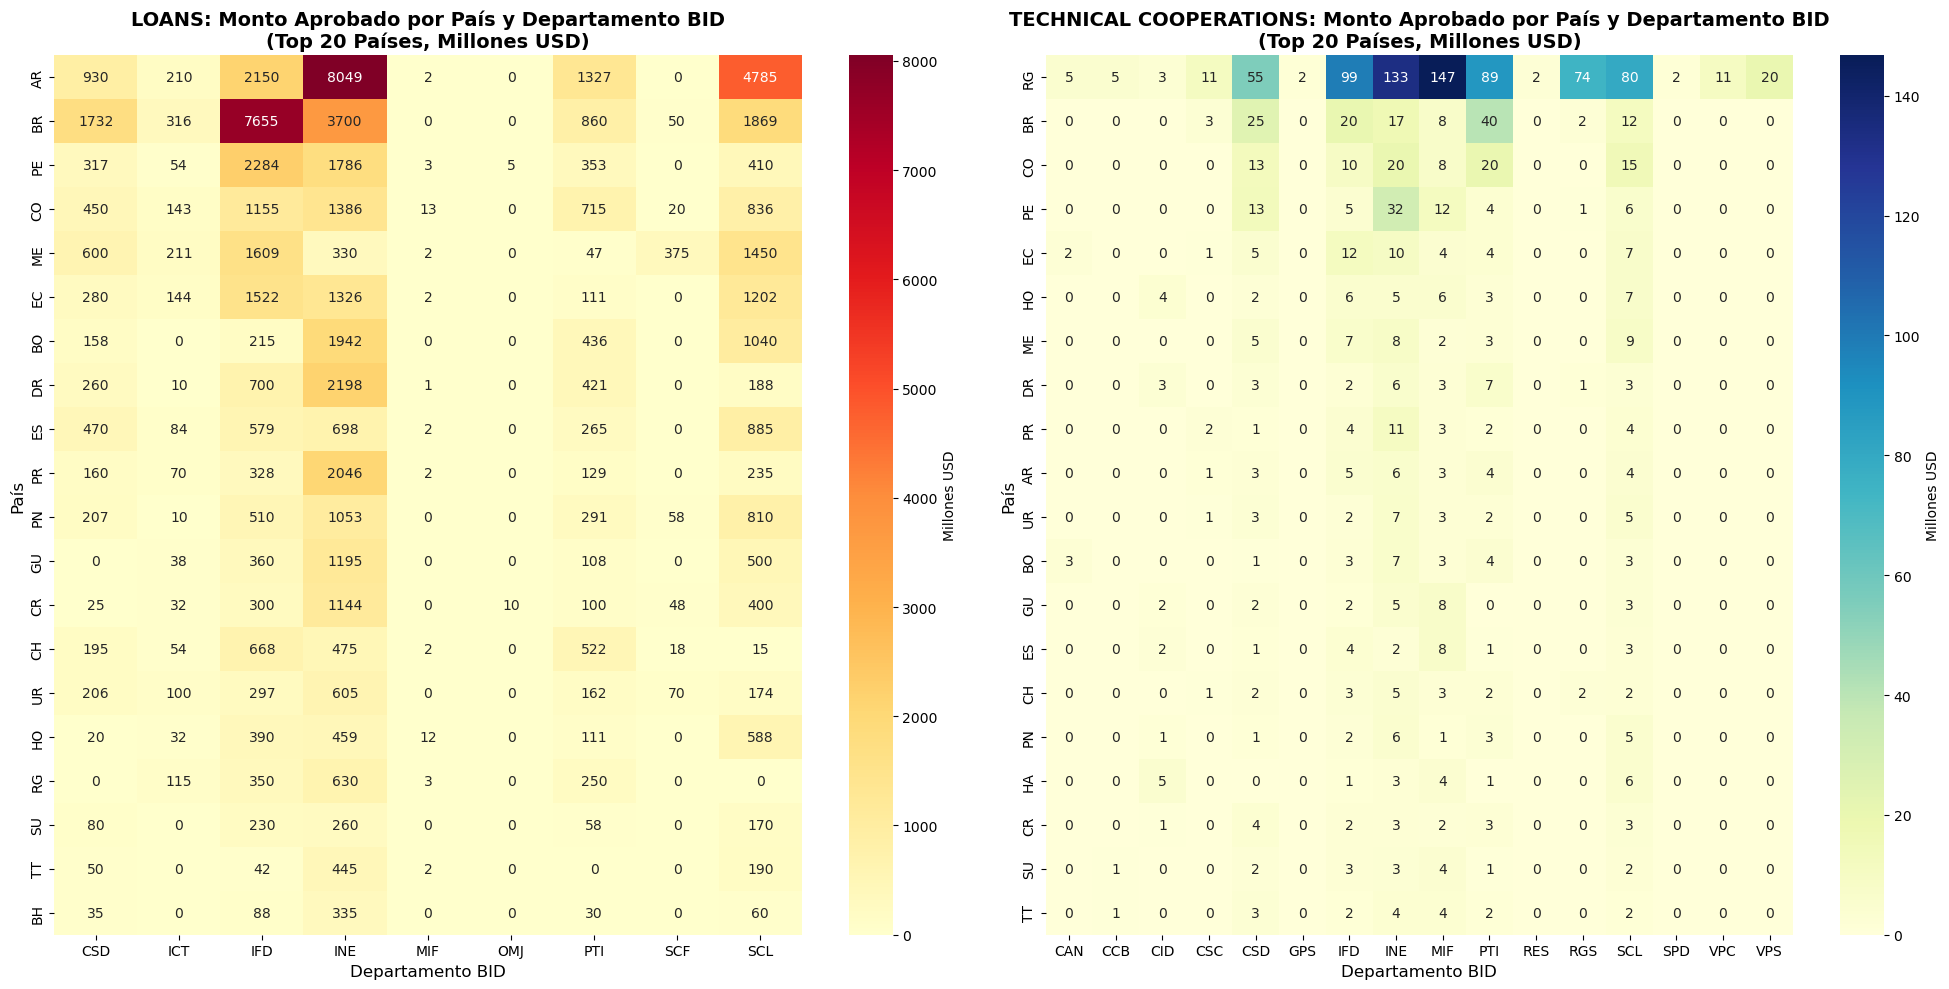


✓ Mapas de calor generados


In [10]:
# ============================================================================
# 7. MAPAS DE CALOR: PAÍS vs DEPARTAMENTO
# ============================================================================

print("\n" + "="*80)
print("7. VISUALIZACIONES: PAÍSES vs DEPARTAMENTOS")
print("="*80)

# Preparar datos para heatmaps
# LOANS: País x Departamento
loans_pais_dept = loans_only.groupby(['cntry_benfit', 'prep_resp_dept_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
# Filtrar top 20 países por monto total
top_paises_loans = loans_only.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(20).index
loans_pais_dept = loans_pais_dept.loc[top_paises_loans]

# TCs: País x Departamento
tc_pais_dept = tc_only.groupby(['cntry_benfit', 'prep_resp_dept_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
# Filtrar top 20 países por monto total
top_paises_tc = tc_only.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(20).index
tc_pais_dept = tc_pais_dept.loc[top_paises_tc]

# Crear heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap Loans
sns.heatmap(loans_pais_dept, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Millones USD'})
axes[0].set_title('LOANS: Monto Aprobado por País y Departamento BID\n(Top 20 Países, Millones USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Departamento BID', fontsize=12)
axes[0].set_ylabel('País', fontsize=12)

# Heatmap TCs
sns.heatmap(tc_pais_dept, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Millones USD'})
axes[1].set_title('TECHNICAL COOPERATIONS: Monto Aprobado por País y Departamento BID\n(Top 20 Países, Millones USD)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Departamento BID', fontsize=12)
axes[1].set_ylabel('País', fontsize=12)

plt.tight_layout()
plt.show()

print("\n✓ Mapas de calor generados")

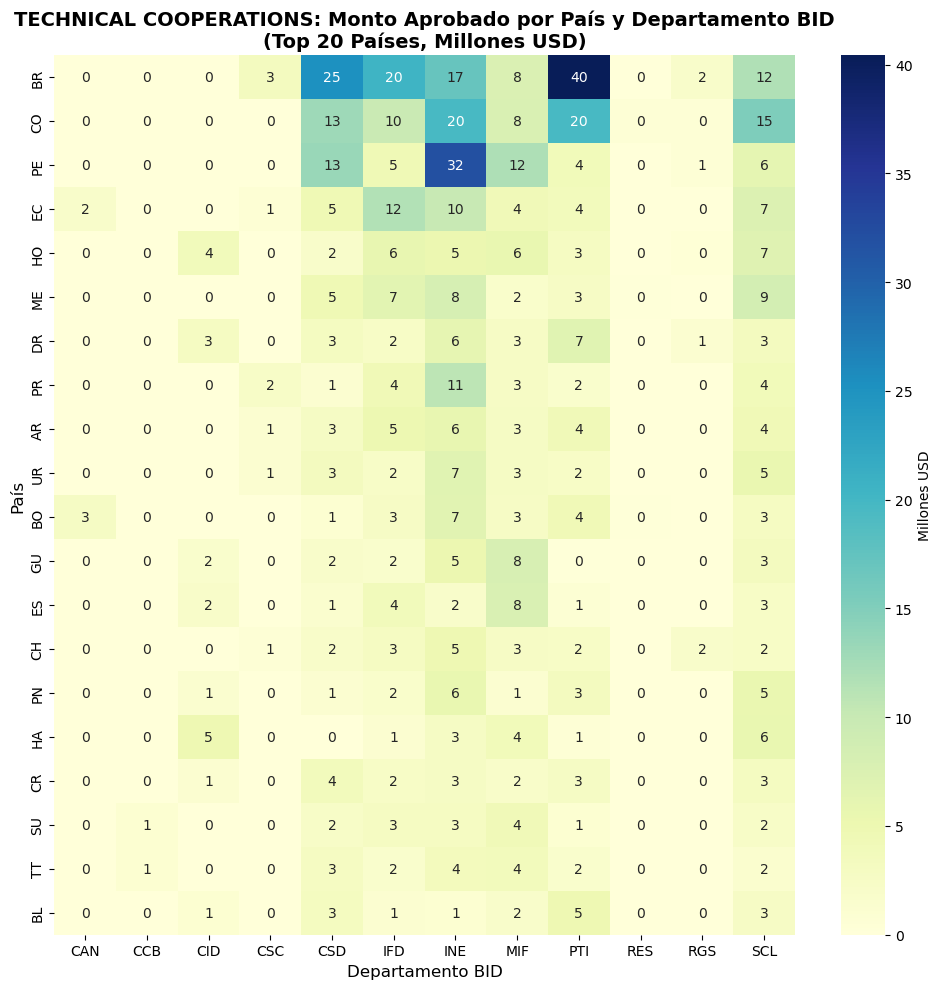

In [35]:
# TCs: País x Departamento (SIN RG)
tc_sin_rg = tc_only[tc_only['cntry_benfit'] != 'RG']
tc_pais_dept = tc_sin_rg.groupby(['cntry_benfit', 'prep_resp_dept_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
# Filtrar top 20 países por monto total
top_paises_tc = tc_sin_rg.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(20).index
tc_pais_dept = tc_pais_dept.loc[top_paises_tc]

# Crear heatmaps
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

# Heatmap TCs
sns.heatmap(tc_pais_dept, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes, cbar_kws={'label': 'Millones USD'})
axes.set_title('TECHNICAL COOPERATIONS: Monto Aprobado por País y Departamento BID\n(Top 20 Países, Millones USD)', fontsize=14, fontweight='bold')
axes.set_xlabel('Departamento BID', fontsize=12)
axes.set_ylabel('País', fontsize=12)

plt.tight_layout()
plt.show()

In [36]:
# Ver la relación Rollup → Departamento
print("=== RELACIÓN VICEPRESIDENCIA → DEPARTAMENTO ===")
rollup_dept = df_activo.groupby(['prep_resp_rollup_unit_cd', 'prep_resp_dept_cd']).size().unstack(fill_value=0)
print(rollup_dept)

# O más simple:
print("\n=== DEPARTAMENTOS POR VICEPRESIDENCIA ===")
for vp in df_activo['prep_resp_rollup_unit_cd'].dropna().unique():
    depts = df_activo[df_activo['prep_resp_rollup_unit_cd'] == vp]['prep_resp_dept_cd'].unique()
    print(f"\n{vp}: {sorted(depts)}")# Verificar departamentos en VPC y VPS
print("=== DEPARTAMENTOS EN VPC (Countries) ===")
vpc_depts = df_activo[df_activo['prep_resp_rollup_unit_cd'] == 'VPC']['prep_resp_dept_cd'].unique()
print(sorted(vpc_depts))

print("\n=== DEPARTAMENTOS EN VPS (Sectors) ===")
vps_depts = df_activo[df_activo['prep_resp_rollup_unit_cd'] == 'VPS']['prep_resp_dept_cd'].unique()
print(sorted(vps_depts))

=== RELACIÓN VICEPRESIDENCIA → DEPARTAMENTO ===
prep_resp_dept_cd         AUG  BDA  CAN  CCB  CID  CSC  CSD  EXC  EXD  EXE  \
prep_resp_rollup_unit_cd                                                     
EXD                         0    0    0    0    0    0    0    0    3    0   
EXE                        54    0    0    0    0    0    0   10   57    6   
IDB                         0    0    0    0    0    0    0    0    0    2   
IIC                         0    0    0    0    0    0    0    0    0    0   
VHR                         0    0    0    0    0    0    0    0    0    0   
VPC                         0    0  180  254  415  223    0    0    0    0   
VPF                         0  113    0    0    0    0    0    0    0    0   
VPP                         0    0    0    0    0    0    0    0    0    0   
VPS                         0    0    0    0    0    0  406    0    0    0   

prep_resp_dept_cd         ...  RMG  SCF  SCL  SEC  SPD  TTD  VPC  VPF  VPP  \
prep_resp_rollu

In [37]:
# Verificar departamentos en VPC y VPS
print("=== DEPARTAMENTOS EN VPC (Countries) ===")
vpc_depts = df_activo[df_activo['prep_resp_rollup_unit_cd'] == 'VPC']['prep_resp_dept_cd'].unique()
print(sorted(vpc_depts))

print("\n=== DEPARTAMENTOS EN VPS (Sectors) ===")
vps_depts = df_activo[df_activo['prep_resp_rollup_unit_cd'] == 'VPS']['prep_resp_dept_cd'].unique()
print(sorted(vps_depts))

=== DEPARTAMENTOS EN VPC (Countries) ===
['CAN', 'CCB', 'CID', 'CSC', 'VPC']

=== DEPARTAMENTOS EN VPS (Sectors) ===
['CSD', 'IFD', 'INE', 'KIC', 'PTI', 'RES', 'SCL', 'VPS']


In [39]:
# Verificar qué hay en cada combinación
print("=== VERIFICACIÓN DE DATOS ===")
print(f"\nLOANS VPC: {len(loans_vpc)} operaciones, ${loans_vpc['orig_apprvd_useq_amnt'].sum():.1f}M")
print(f"LOANS VPS: {len(loans_vps)} operaciones, ${loans_vps['orig_apprvd_useq_amnt'].sum():.1f}M")
print(f"TCs VPC: {len(tc_vpc)} operaciones, ${tc_vpc['orig_apprvd_useq_amnt'].sum():.1f}M")
print(f"TCs VPS: {len(tc_vps)} operaciones, ${tc_vps['orig_apprvd_useq_amnt'].sum():.1f}M")

# Ver si los heatmaps tienen datos
print(f"\nHeatmap shapes:")
print(f"LOANS VPC: {loans_vpc_heatmap.shape}")
print(f"LOANS VPS: {loans_vps_heatmap.shape}")
print(f"TCs VPC: {tc_vpc_heatmap.shape}")
print(f"TCs VPS: {tc_vps_heatmap.shape}")

=== VERIFICACIÓN DE DATOS ===

LOANS VPC: 0 operaciones, $0.0M
LOANS VPS: 729 operaciones, $80411.9M
TCs VPC: 116 operaciones, $47.9M
TCs VPS: 1374 operaciones, $606.9M

Heatmap shapes:
LOANS VPC: (0, 0)
LOANS VPS: (20, 5)
TCs VPC: (20, 4)
TCs VPS: (20, 6)


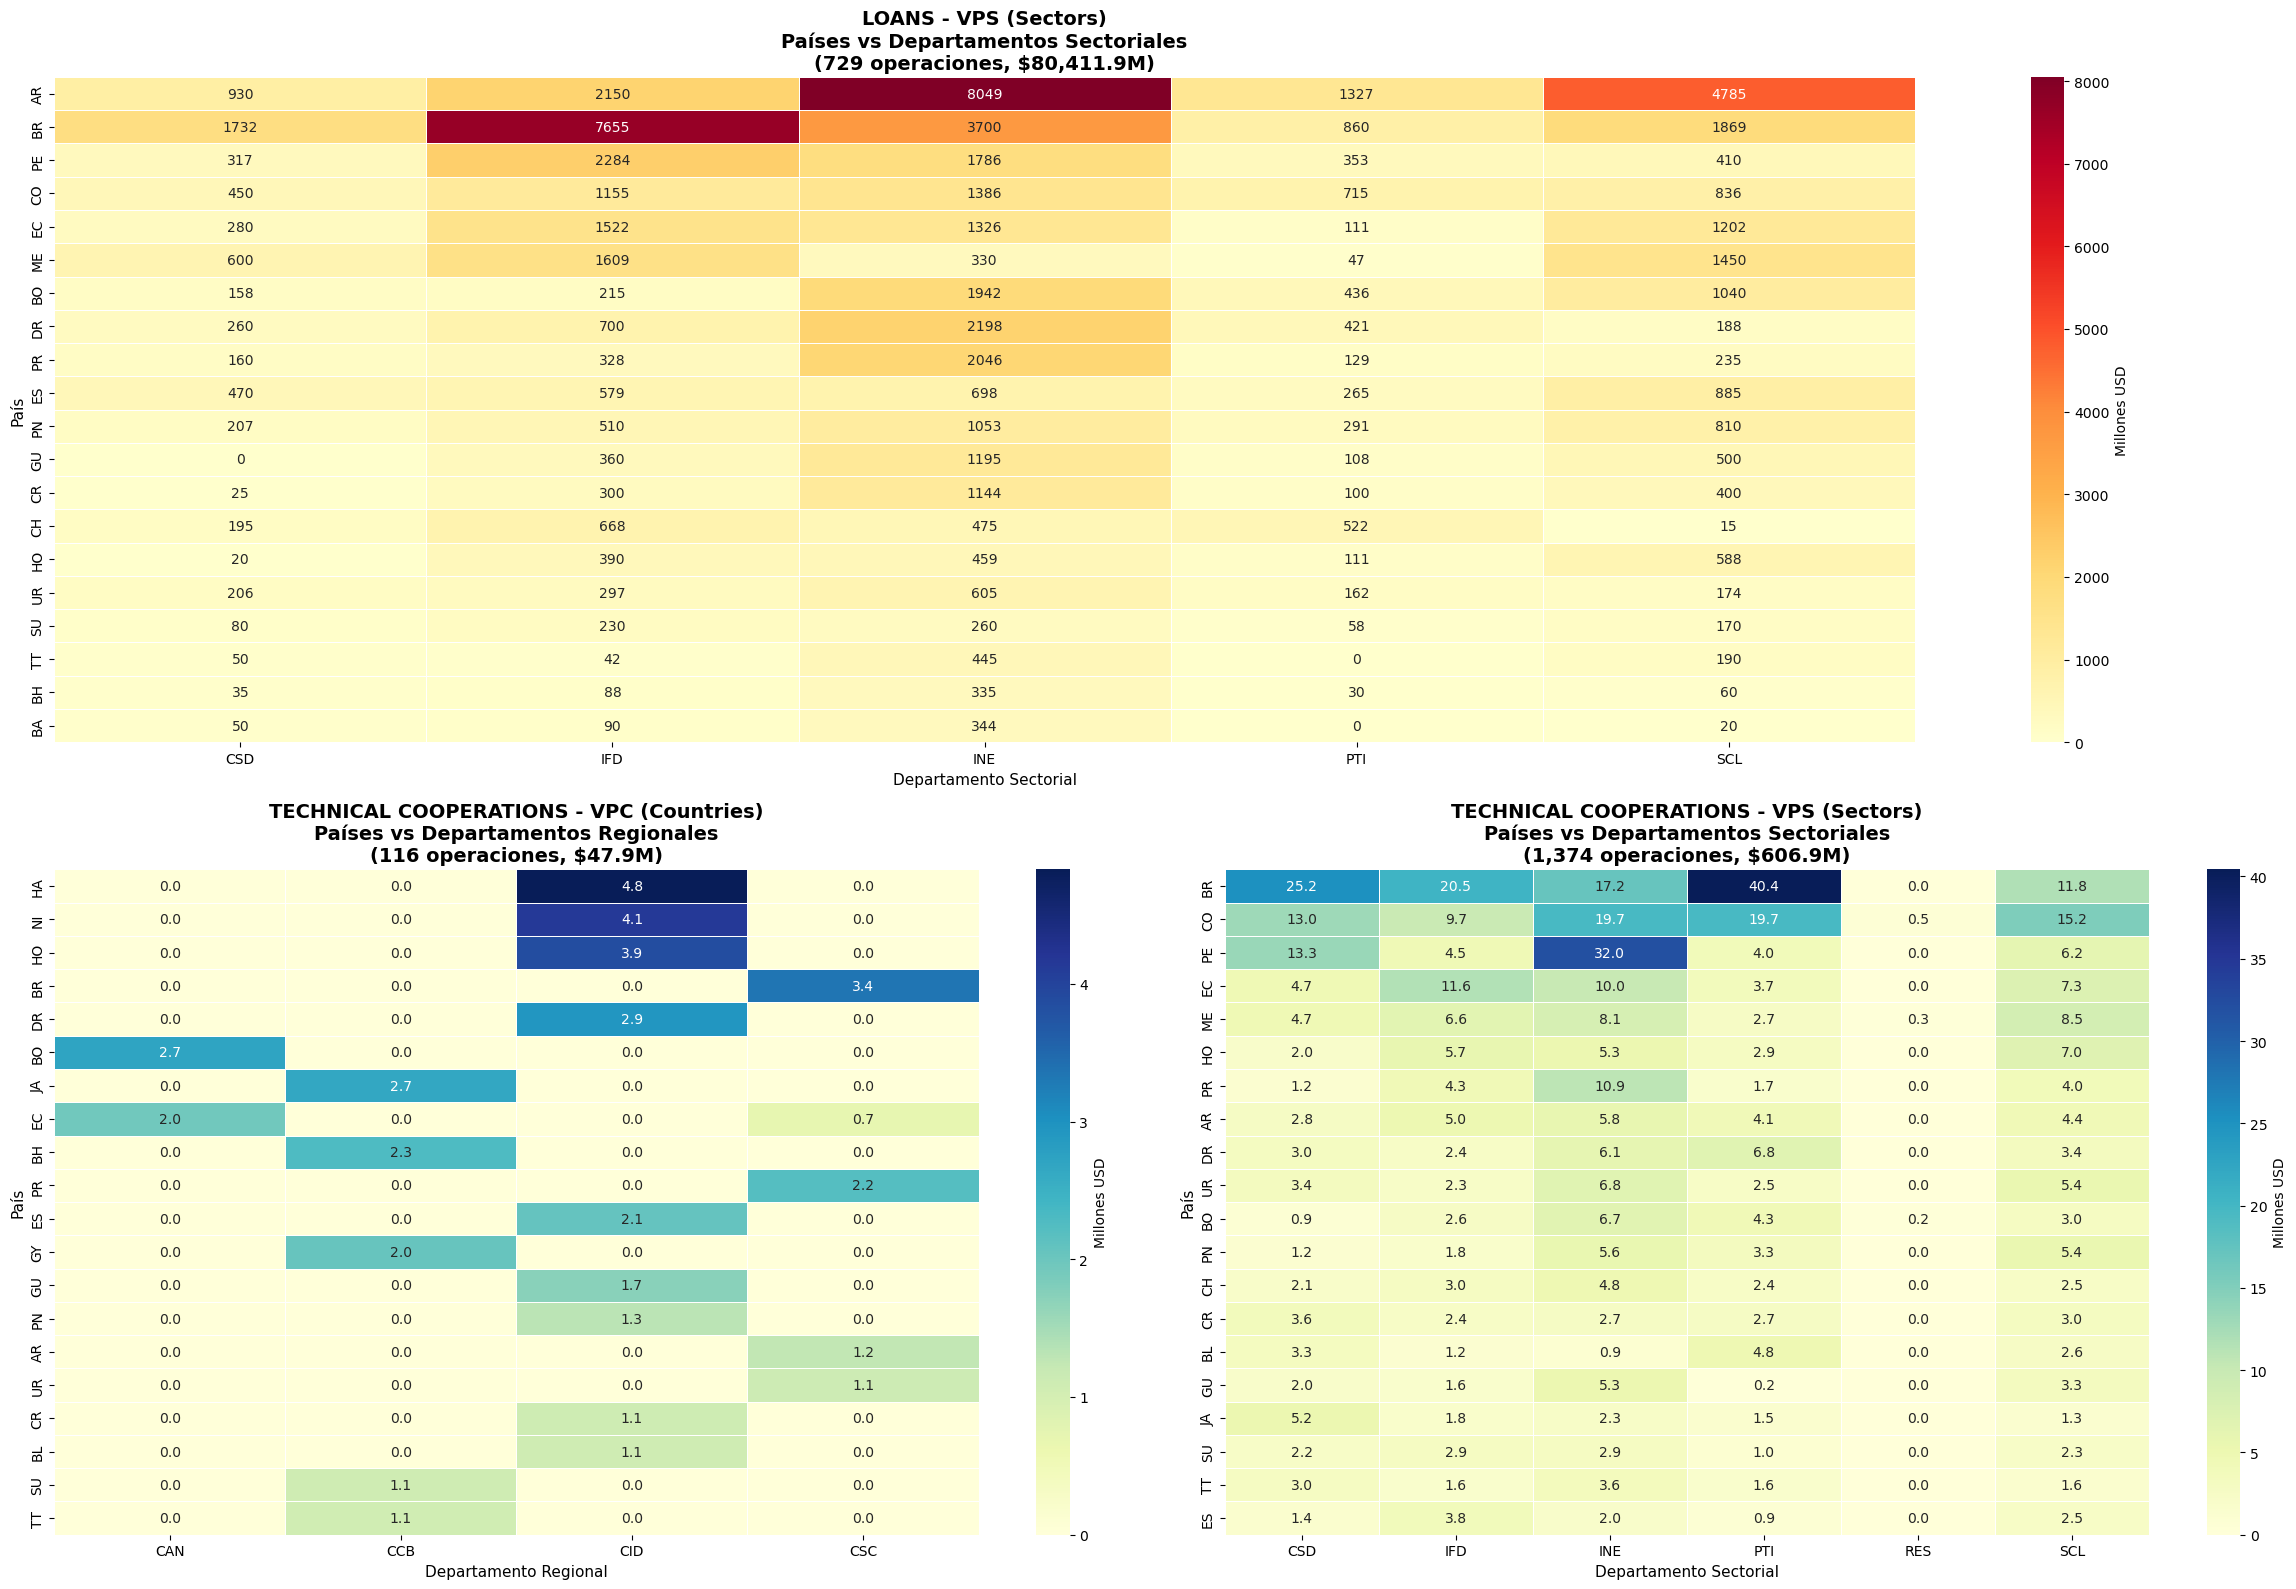


✓ 3 Mapas de calor generados

NOTA: LOANS VPC no tiene datos - todos los préstamos activos son manejados por departamentos sectoriales (VPS)


In [40]:
# ============================================================================
# MAPAS DE CALOR: 3 HEATMAPS (solo combinaciones con datos)
# ============================================================================

# Crear figura con 3 subplots (2x2 pero usando solo 3)
fig = plt.figure(figsize=(24, 16))

# 1. LOANS VPS (posición 1, ocupa toda la fila superior)
ax1 = plt.subplot(2, 2, (1, 2))  # Ocupa columnas 1 y 2 de la fila 1
sns.heatmap(loans_vps_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1, 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
ax1.set_title('LOANS - VPS (Sectors)\nPaíses vs Departamentos Sectoriales\n(729 operaciones, $80,411.9M)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Departamento Sectorial', fontsize=11)
ax1.set_ylabel('País', fontsize=11)

# 2. TCs VPC (posición 3, abajo izquierda)
ax2 = plt.subplot(2, 2, 3)
sns.heatmap(tc_vpc_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax2, 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
ax2.set_title('TECHNICAL COOPERATIONS - VPC (Countries)\nPaíses vs Departamentos Regionales\n(116 operaciones, $47.9M)', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Departamento Regional', fontsize=11)
ax2.set_ylabel('País', fontsize=11)

# 3. TCs VPS (posición 4, abajo derecha)
ax3 = plt.subplot(2, 2, 4)
sns.heatmap(tc_vps_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax3, 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
ax3.set_title('TECHNICAL COOPERATIONS - VPS (Sectors)\nPaíses vs Departamentos Sectoriales\n(1,374 operaciones, $606.9M)', 
              fontsize=14, fontweight='bold')
ax3.set_xlabel('Departamento Sectorial', fontsize=11)
ax3.set_ylabel('País', fontsize=11)

plt.tight_layout()
plt.show()

print("\n✓ 3 Mapas de calor generados")
print("\nNOTA: LOANS VPC no tiene datos - todos los préstamos activos son manejados por departamentos sectoriales (VPS)")

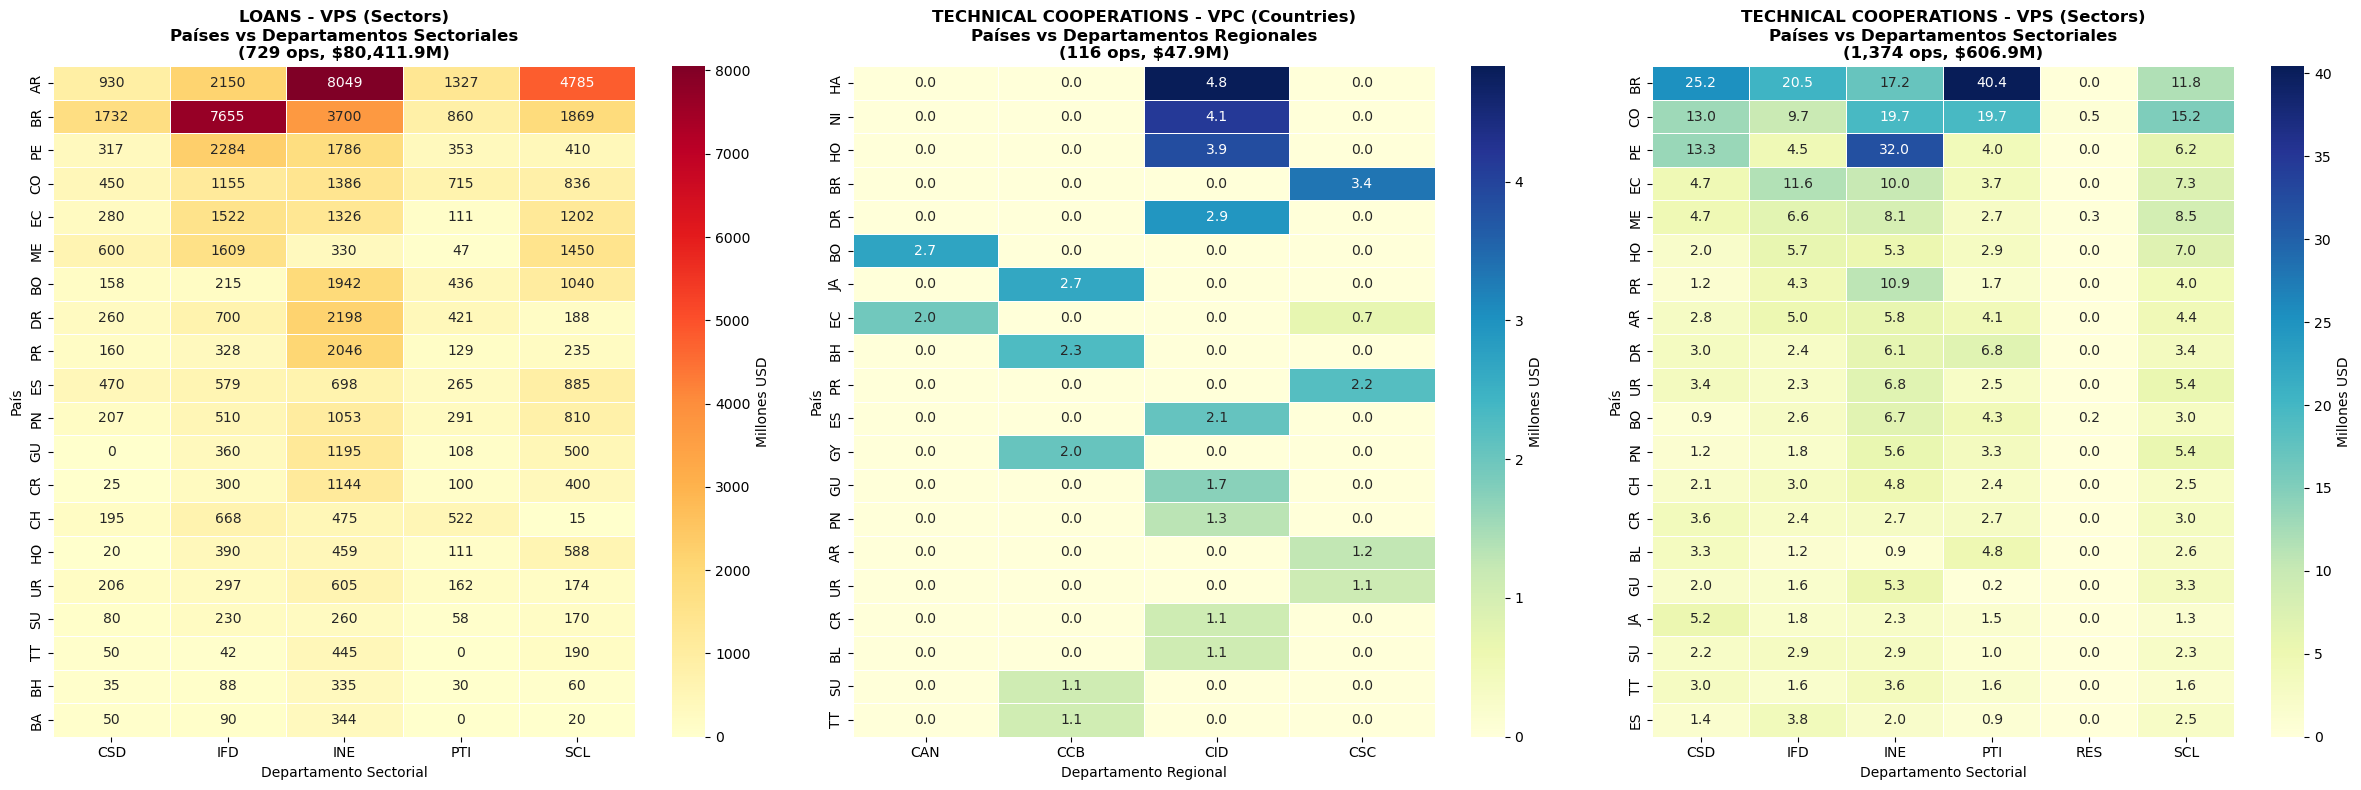


✓ 3 Mapas de calor generados (mismo tamaño)


In [48]:
# ============================================================================
# MAPAS DE CALOR: 3 HEATMAPS (mismo tamaño)
# ============================================================================

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# 1. LOANS VPS
sns.heatmap(loans_vps_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0], 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
axes[0].set_title('LOANS - VPS (Sectors)\nPaíses vs Departamentos Sectoriales\n(729 ops, $80,411.9M)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Departamento Sectorial', fontsize=10)
axes[0].set_ylabel('País', fontsize=10)

# 2. TCs VPC
sns.heatmap(tc_vpc_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1], 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
axes[1].set_title('TECHNICAL COOPERATIONS - VPC (Countries)\nPaíses vs Departamentos Regionales\n(116 ops, $47.9M)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Departamento Regional', fontsize=10)
axes[1].set_ylabel('País', fontsize=10)

# 3. TCs VPS
sns.heatmap(tc_vps_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[2], 
            cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
axes[2].set_title('TECHNICAL COOPERATIONS - VPS (Sectors)\nPaíses vs Departamentos Sectoriales\n(1,374 ops, $606.9M)', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Departamento Sectorial', fontsize=10)
axes[2].set_ylabel('País', fontsize=10)

plt.tight_layout()
plt.show()

print("\n✓ 3 Mapas de calor generados (mismo tamaño)")

In [42]:
# Verificar datos por VP y división
print("=== VERIFICACIÓN: LOANS POR VP Y DIVISIÓN ===")
loans_vpc_div = loans_only[loans_only['prep_resp_rollup_unit_cd'] == 'VPC']
loans_vps_div = loans_only[loans_only['prep_resp_rollup_unit_cd'] == 'VPS']

print(f"\nLOANS VPC: {len(loans_vpc_div)} operaciones")
if len(loans_vpc_div) > 0:
    print(loans_vpc_div['prep_resp_div_cd'].value_counts())

print(f"\nLOANS VPS: {len(loans_vps_div)} operaciones")
print(loans_vps_div['prep_resp_div_cd'].value_counts().head(15))

print("\n=== VERIFICACIÓN: TCs POR VP Y DIVISIÓN ===")
tc_vpc_div = tc_only[tc_only['prep_resp_rollup_unit_cd'] == 'VPC']
tc_vps_div = tc_only[tc_only['prep_resp_rollup_unit_cd'] == 'VPS']

print(f"\nTCs VPC: {len(tc_vpc_div)} operaciones")
print(tc_vpc_div['prep_resp_div_cd'].value_counts().head(15))

print(f"\nTCs VPS: {len(tc_vps_div)} operaciones")
print(tc_vps_div['prep_resp_div_cd'].value_counts().head(15))

=== VERIFICACIÓN: LOANS POR VP Y DIVISIÓN ===

LOANS VPC: 0 operaciones

LOANS VPS: 741 operaciones
prep_resp_div_cd
WSA    96
TSP    76
CMF    65
FMM    64
ICS    63
ENE    57
HUD    55
HNP    44
SPL    44
ARD    40
EDU    39
TIN    33
CTI    26
CIS    26
DRM     7
Name: count, dtype: int64

=== VERIFICACIÓN: TCs POR VP Y DIVISIÓN ===

TCs VPC: 165 operaciones
prep_resp_div_cd
ACU    13
FMP    12
CHO    11
CAN    10
CBH     9
CHA     7
CNI     7
CEC     6
CBA     6
CID     6
CCB     6
CAR     5
CES     5
CJA     5
CBO     5
Name: count, dtype: int64

TCs VPS: 2067 operaciones
prep_resp_div_cd
WSA    163
SPL    160
ENE    143
CTI    132
FMM    130
ICS    126
ARD    125
CMF    124
EDU    117
TSP    115
HNP    112
TIN    111
CCS     99
HUD     89
CIS     62
Name: count, dtype: int64


HEATMAPS: LOANS VPS - PAÍS x DIVISIÓN por Departamento


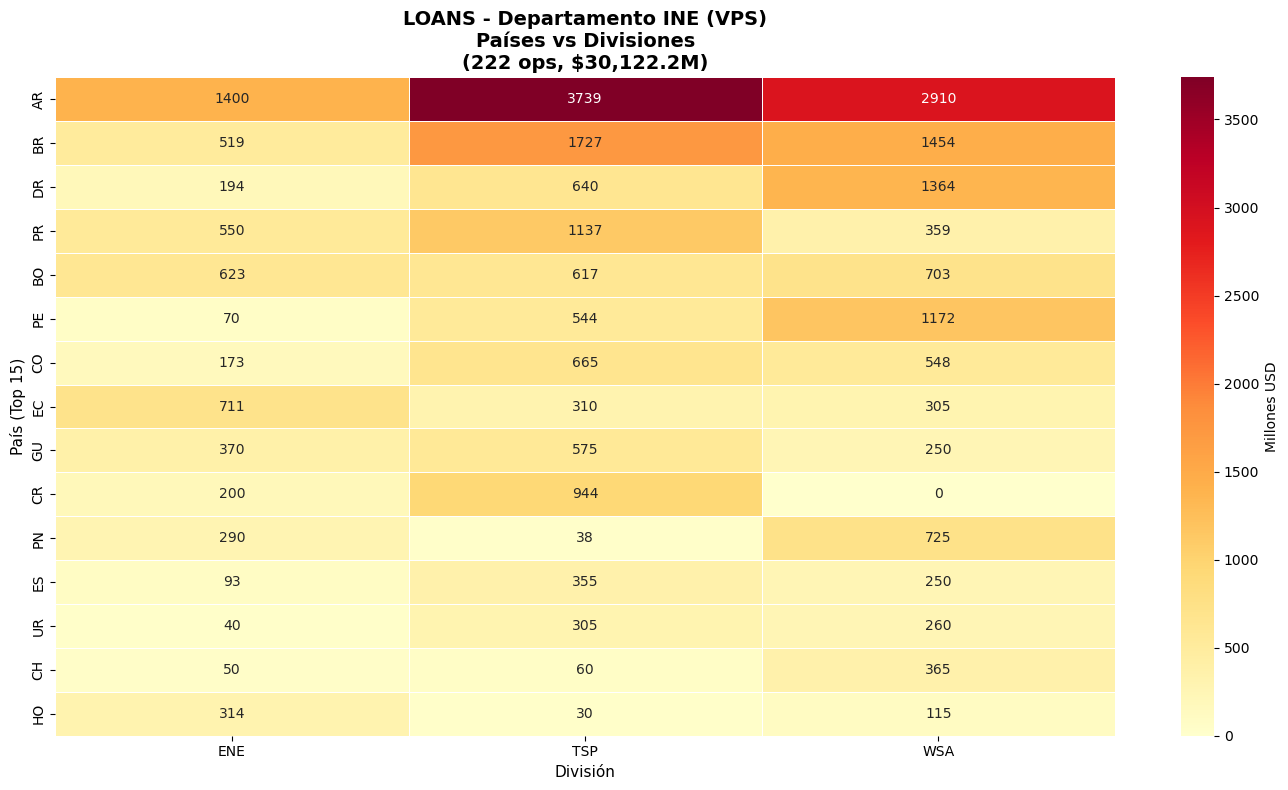

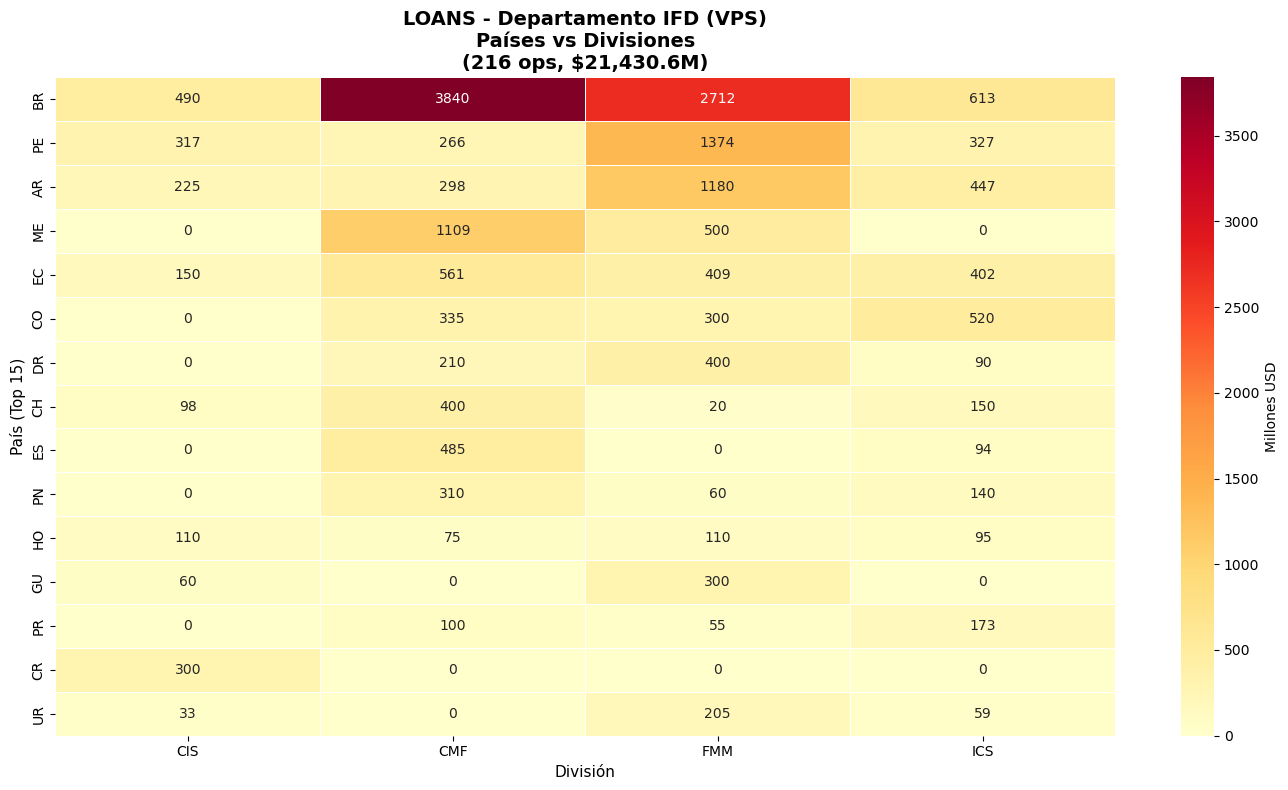

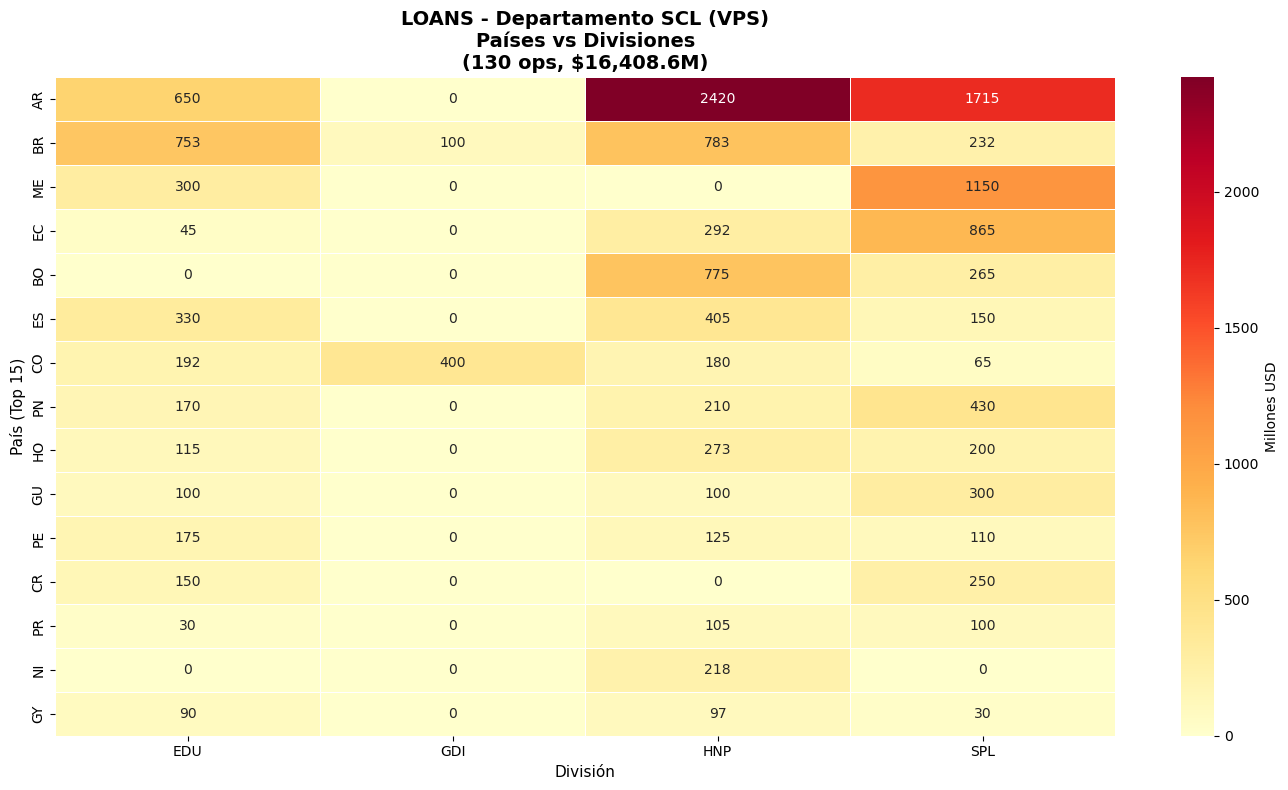

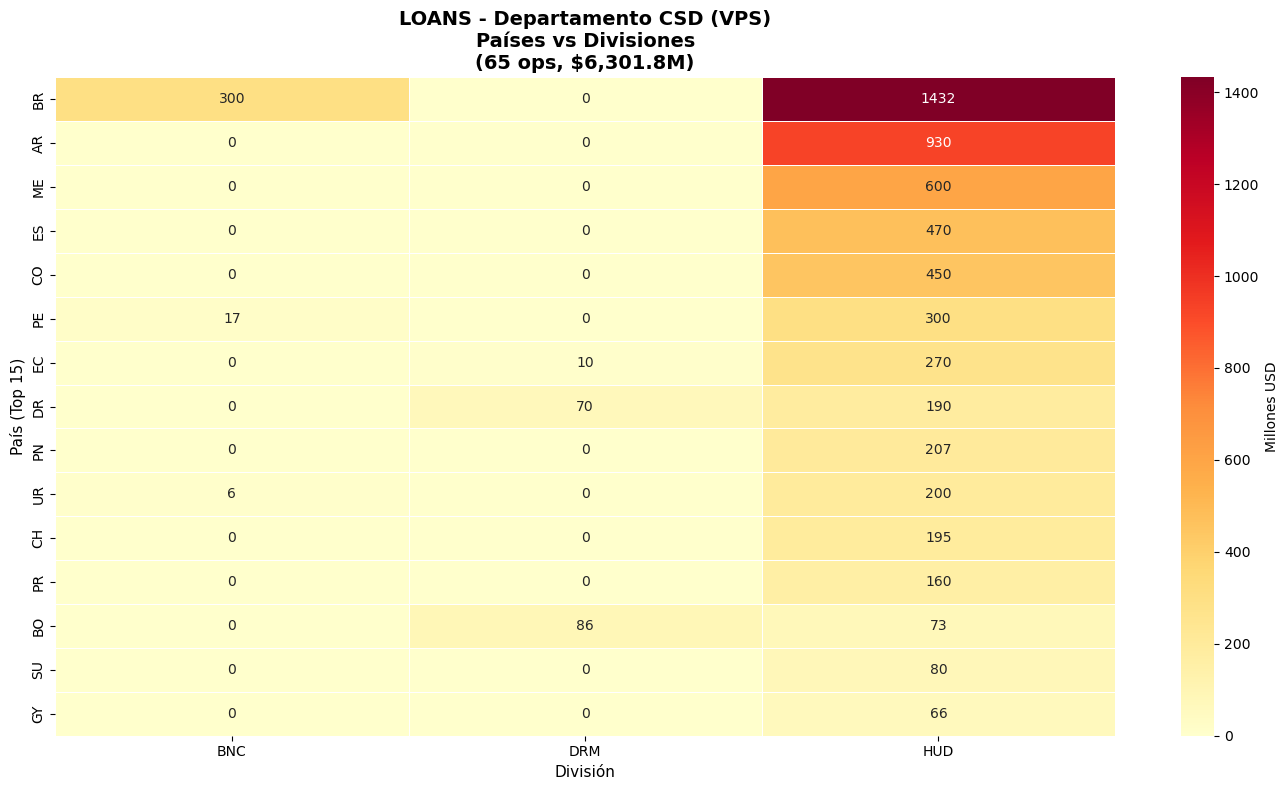

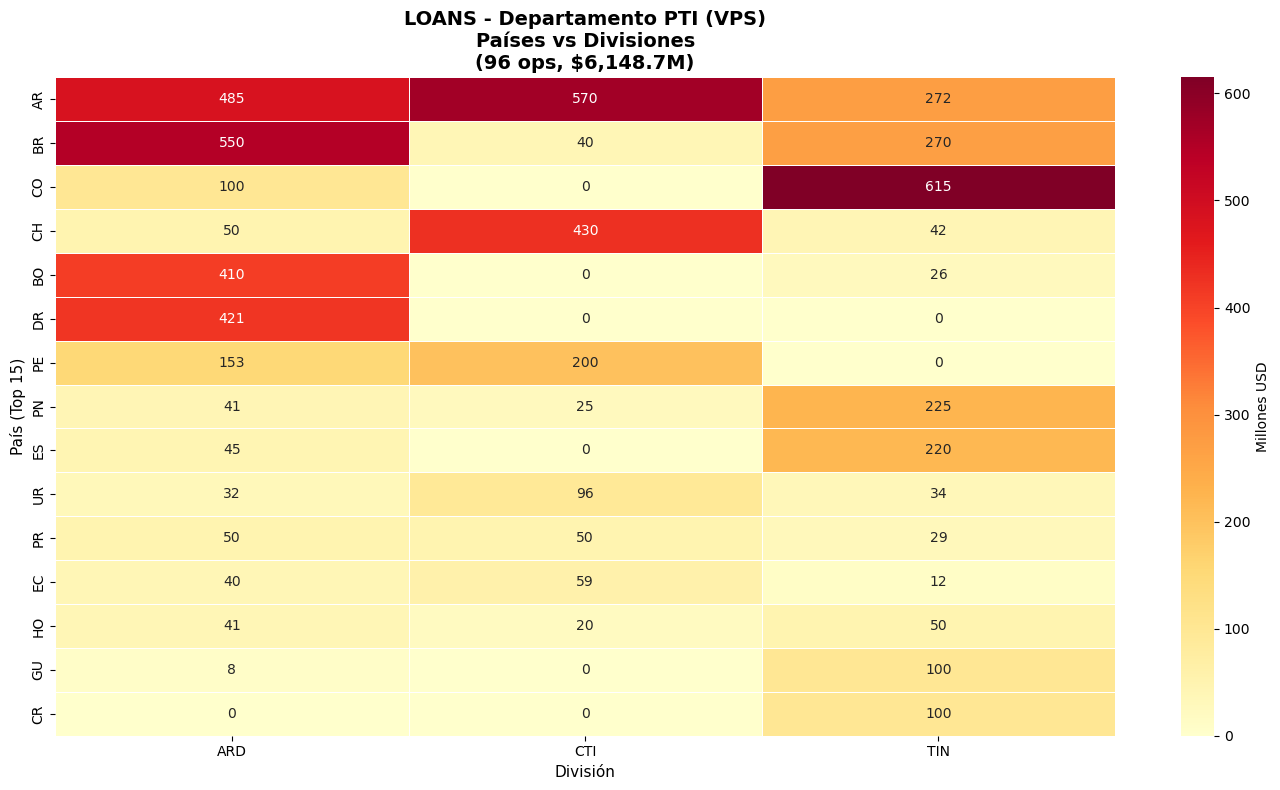


HEATMAPS: TCs VPC - PAÍS x DIVISIÓN por Departamento


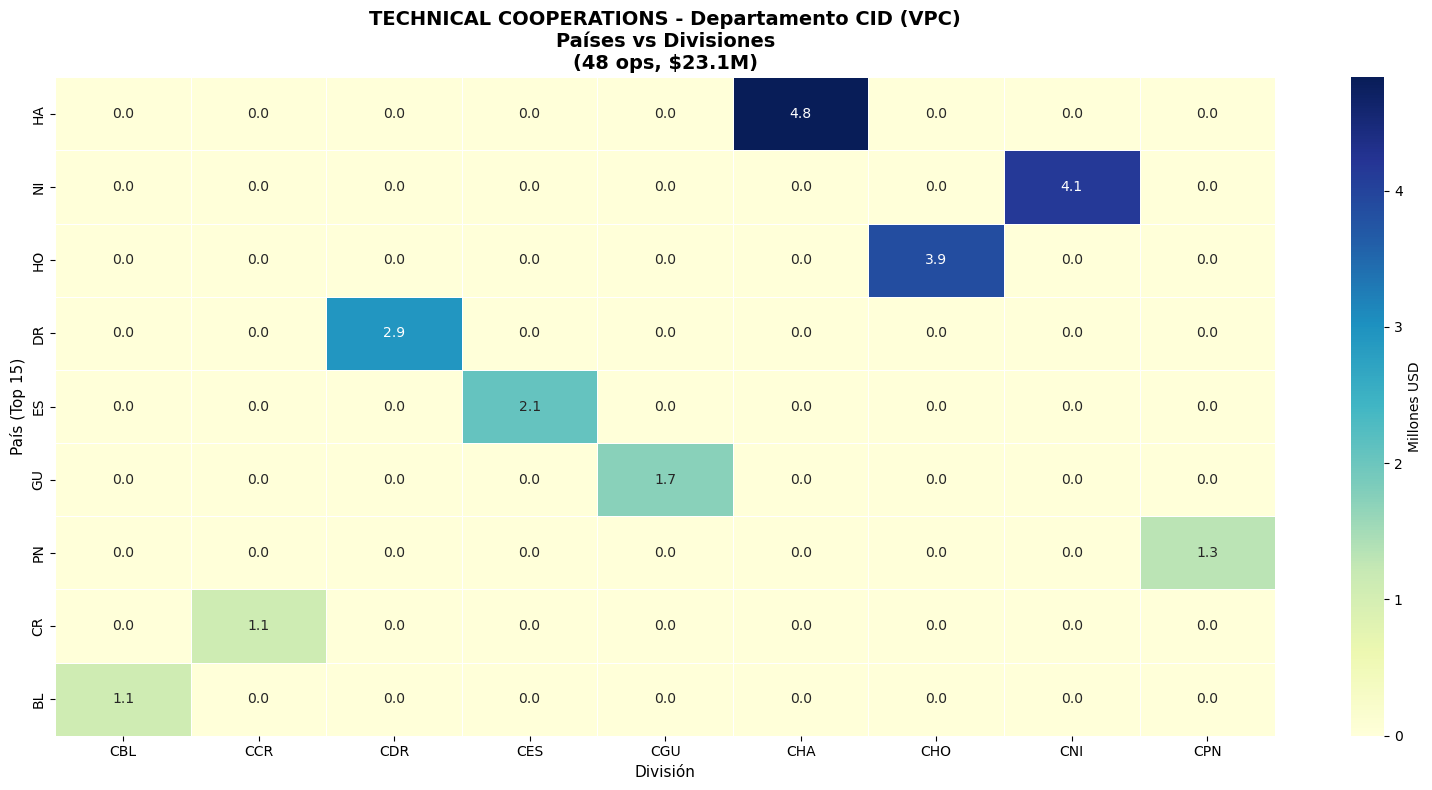

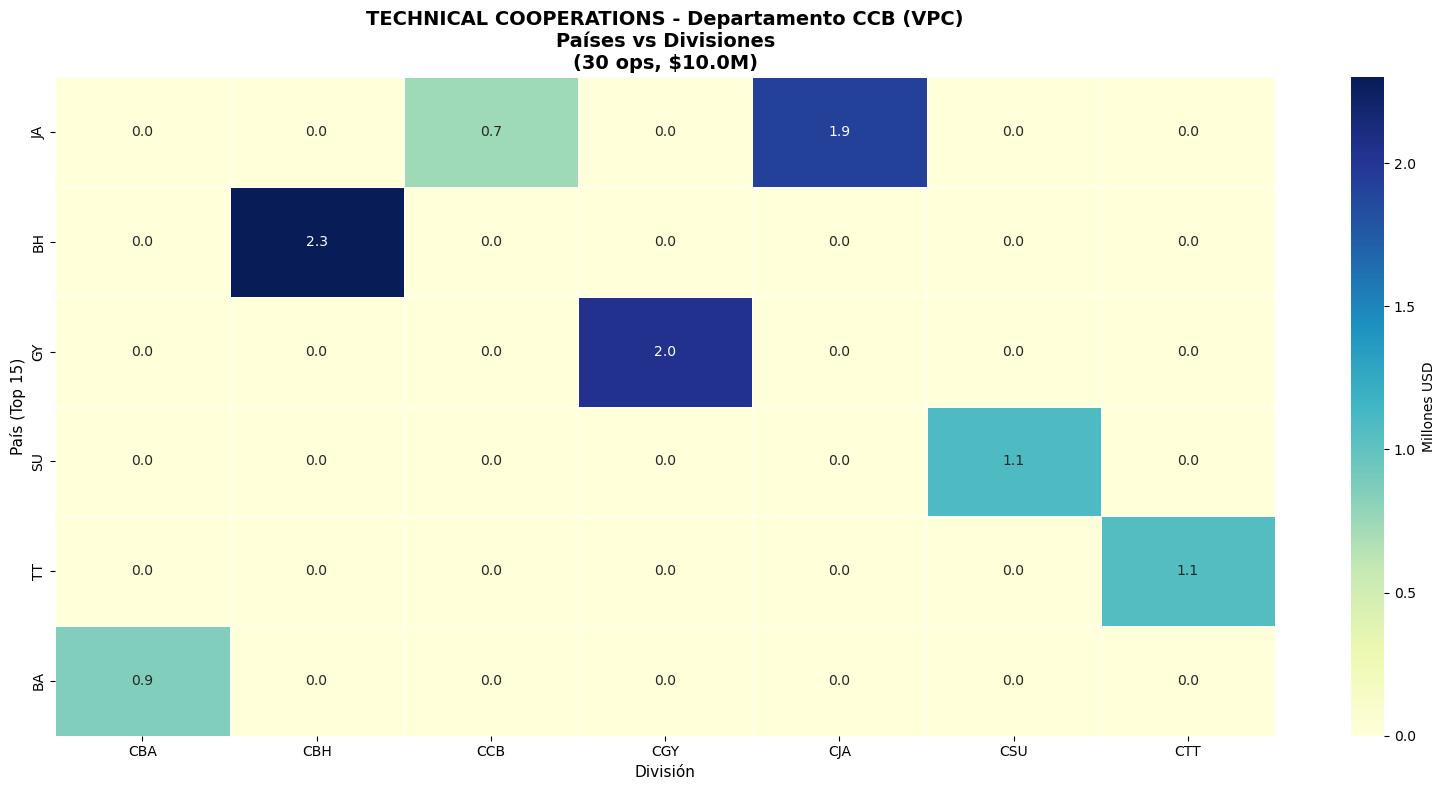

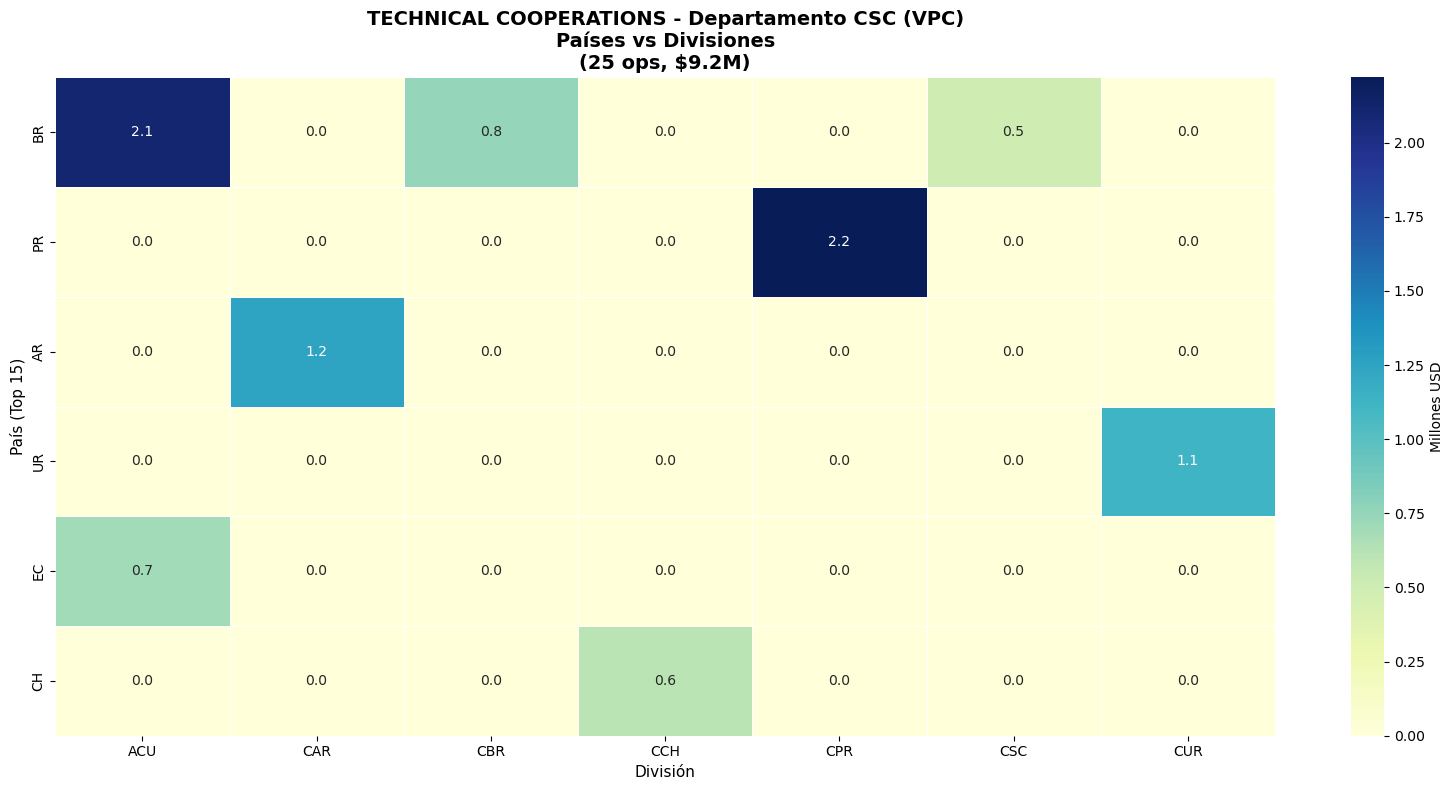

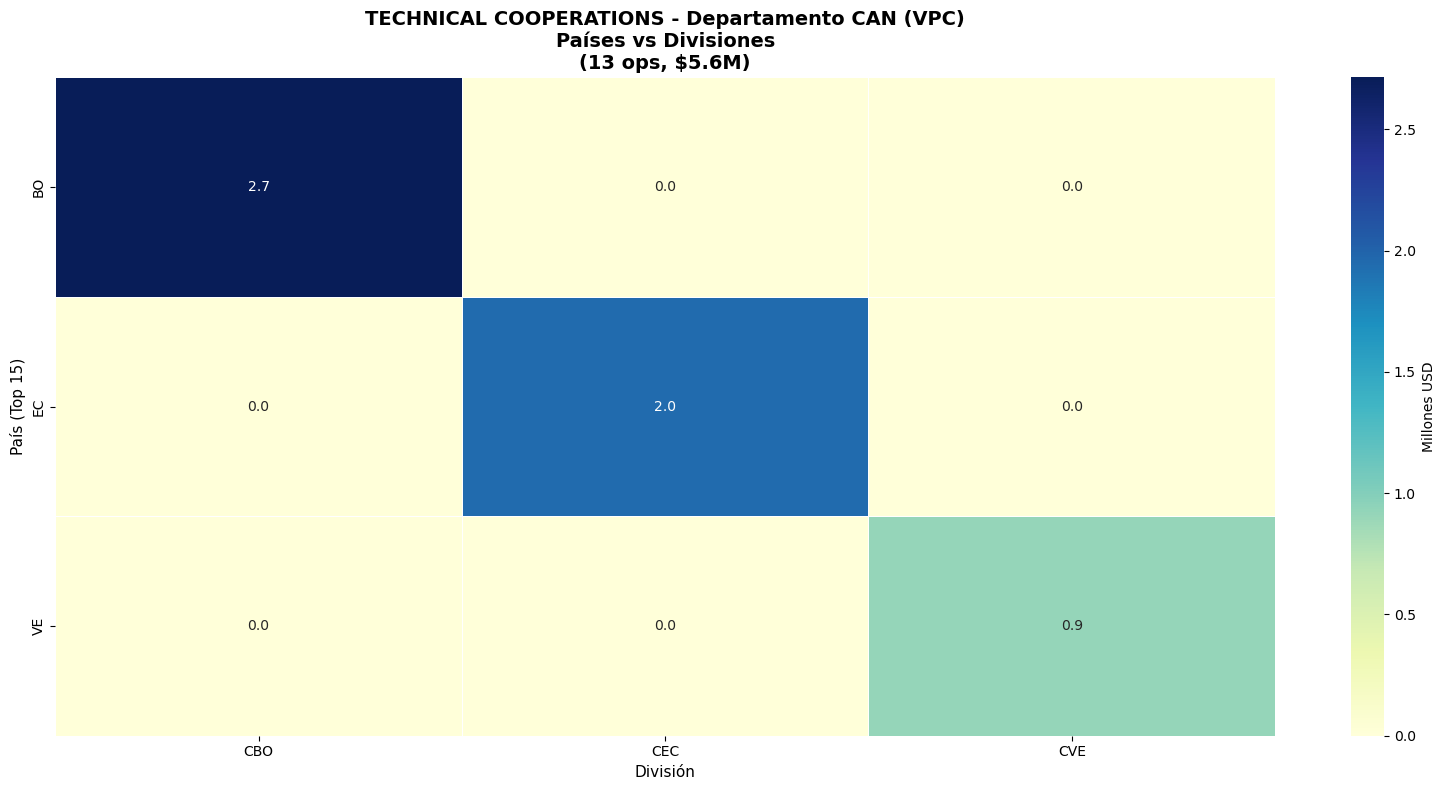


HEATMAPS: TCs VPS - PAÍS x DIVISIÓN por Departamento


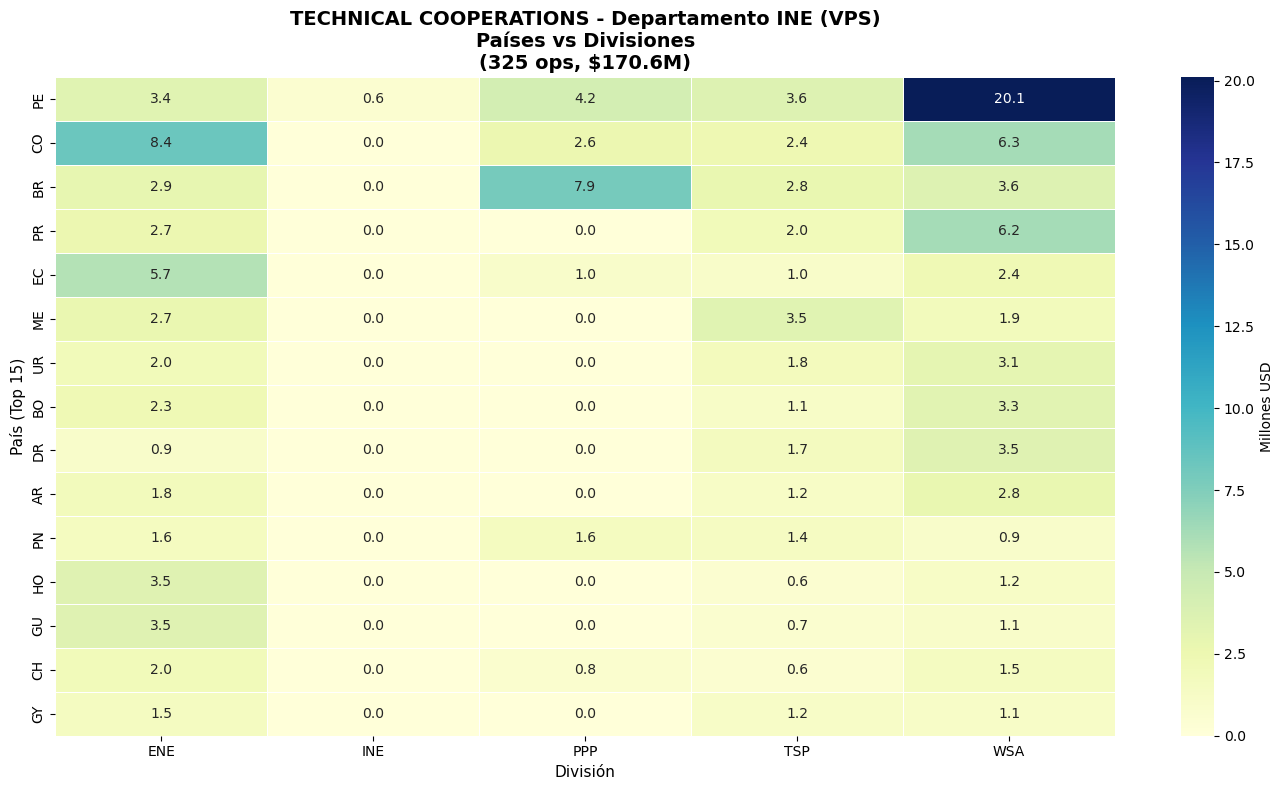

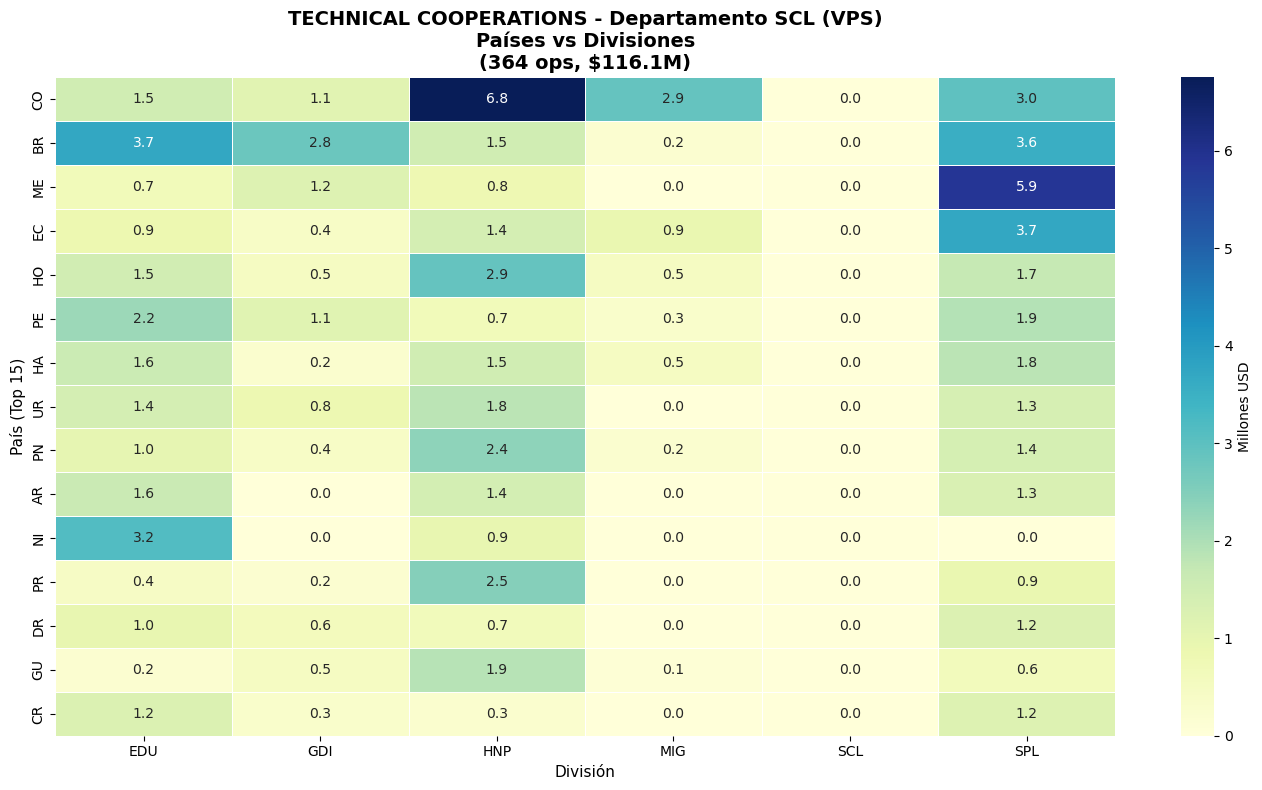

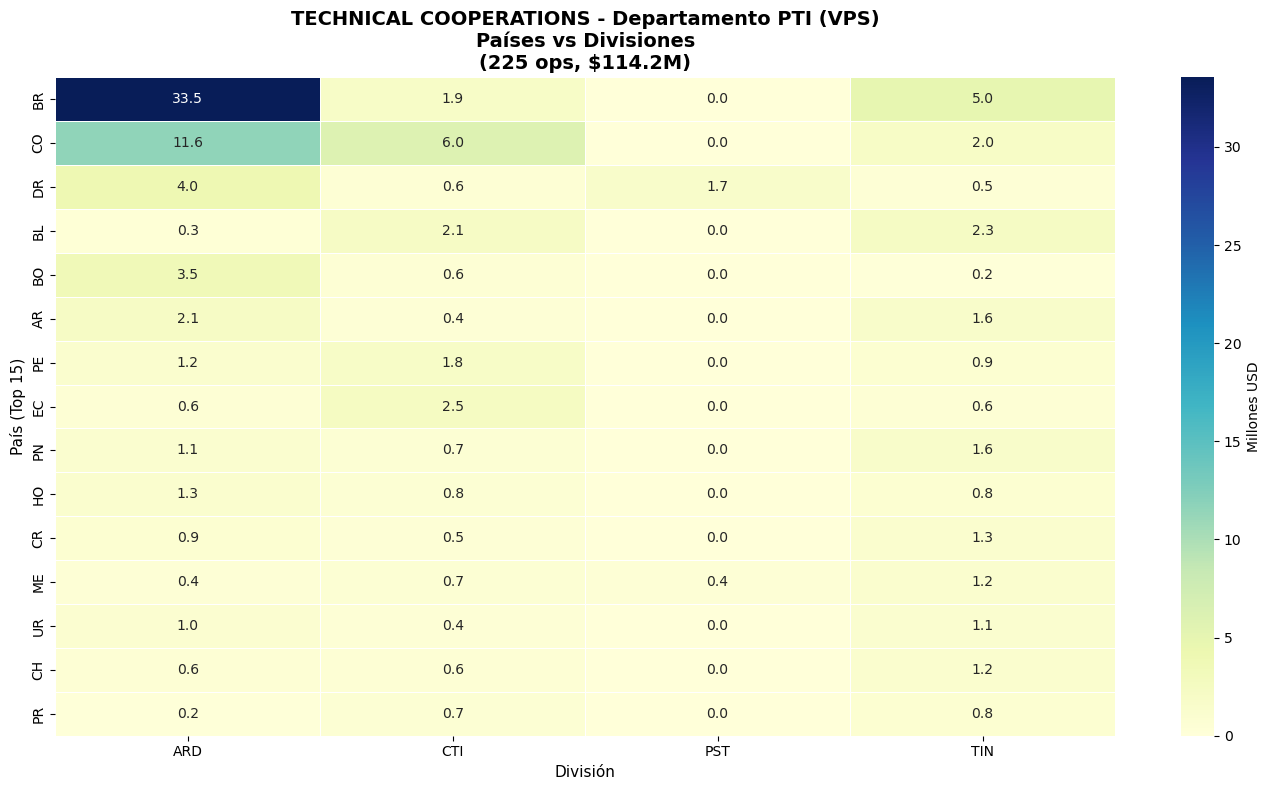

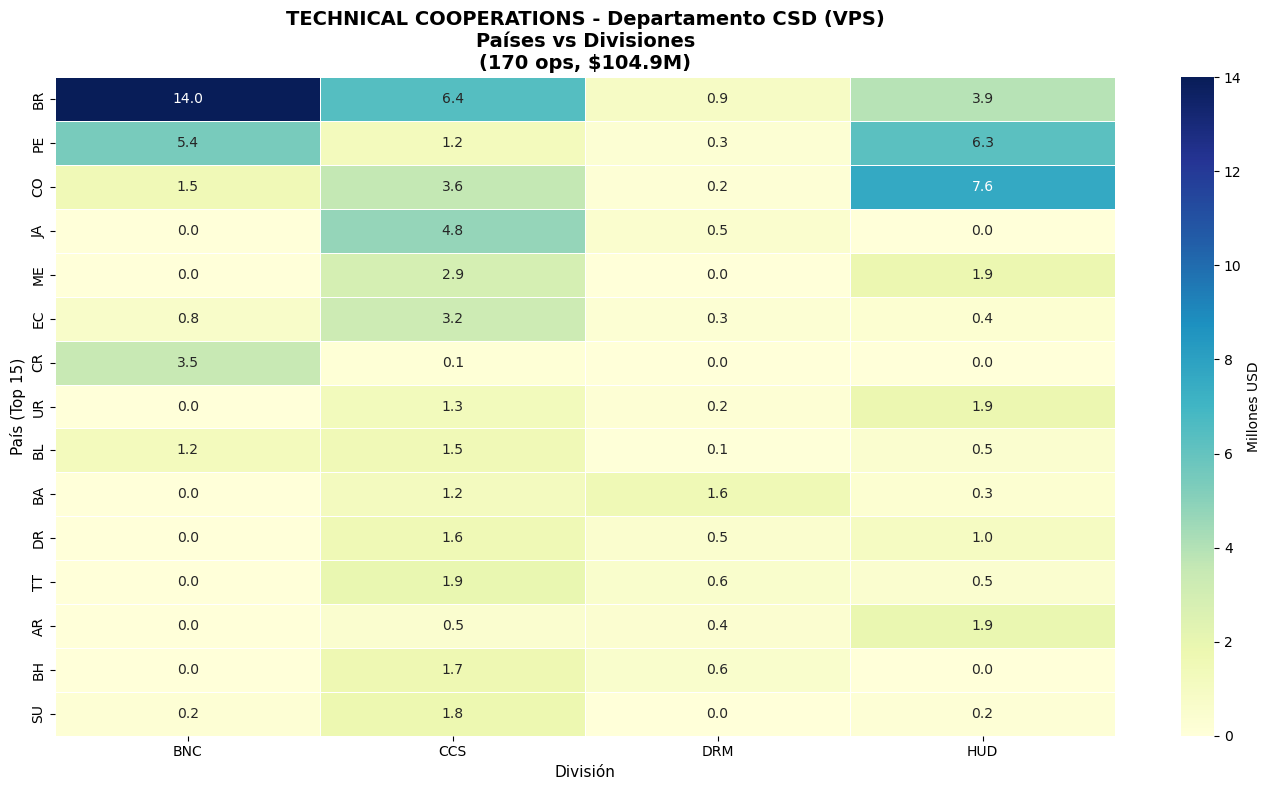

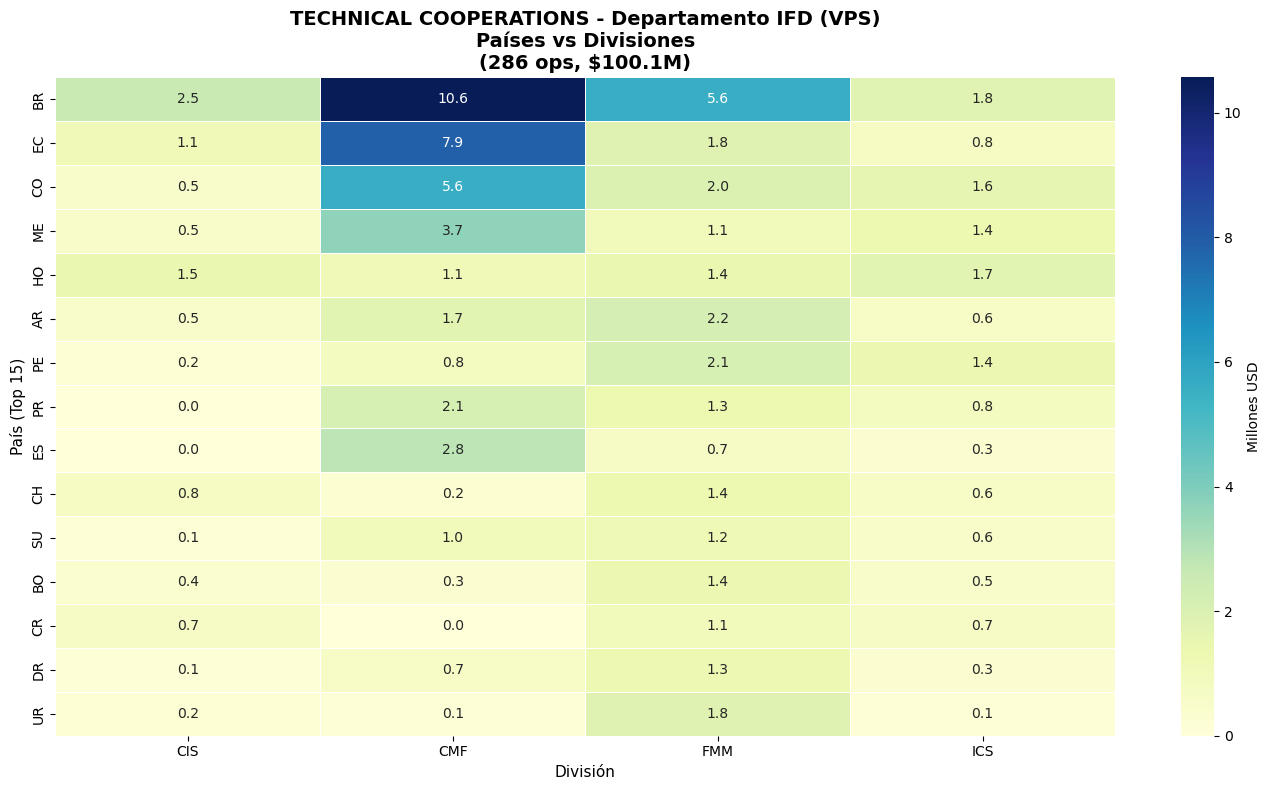

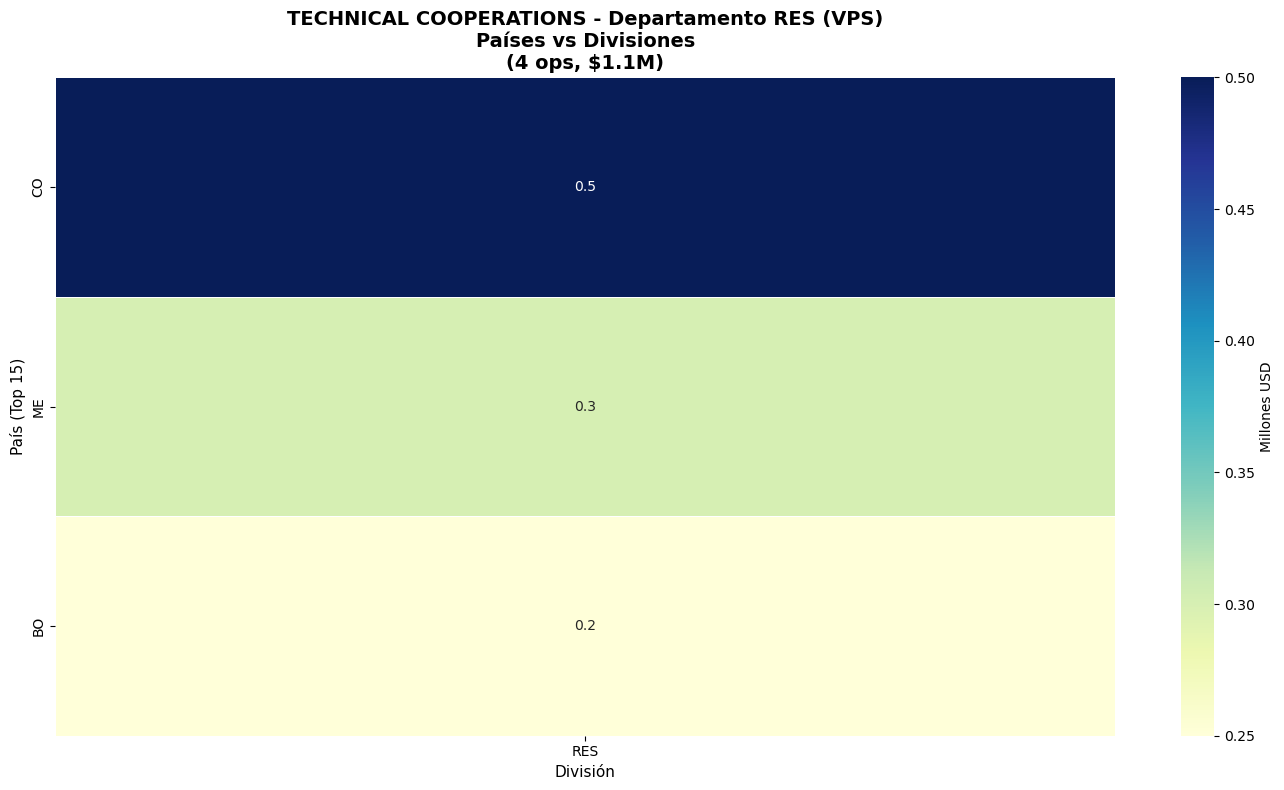


✓ Heatmaps de drill down completados


In [43]:
# ============================================================================
# HEATMAPS: PAÍS x DIVISIÓN (DRILL DOWN POR DEPARTAMENTO)
# ============================================================================

# Excluir RG
loans_vps_nodiv = loans_vps_div[loans_vps_div['cntry_benfit'] != 'RG']
tc_vpc_nodiv = tc_vpc_div[tc_vpc_div['cntry_benfit'] != 'RG']
tc_vps_nodiv = tc_vps_div[tc_vps_div['cntry_benfit'] != 'RG']

# ==== 1. LOANS VPS: Por cada departamento importante ====
print("="*80)
print("HEATMAPS: LOANS VPS - PAÍS x DIVISIÓN por Departamento")
print("="*80)

# Identificar top departamentos en LOANS VPS
top_depts_loans = loans_vps_nodiv.groupby('prep_resp_dept_cd')['orig_apprvd_useq_amnt'].sum().nlargest(6).index

for dept in top_depts_loans:
    dept_data = loans_vps_nodiv[loans_vps_nodiv['prep_resp_dept_cd'] == dept]
    
    # Crear heatmap país x división
    heatmap_data = dept_data.groupby(['cntry_benfit', 'prep_resp_div_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
    
    # Filtrar top 15 países
    top_paises = dept_data.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(15).index
    heatmap_data = heatmap_data.loc[top_paises]
    
    if heatmap_data.shape[0] > 0:
        plt.figure(figsize=(14, 8))
        sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
                    cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
        
        total_ops = len(dept_data)
        total_monto = dept_data['orig_apprvd_useq_amnt'].sum()
        
        plt.title(f'LOANS - Departamento {dept} (VPS)\nPaíses vs Divisiones\n({total_ops} ops, ${total_monto:,.1f}M)', 
                  fontsize=14, fontweight='bold')
        plt.xlabel('División', fontsize=11)
        plt.ylabel('País (Top 15)', fontsize=11)
        plt.tight_layout()
        plt.show()

# ==== 2. TCs VPC: Por cada departamento importante ====
print("\n" + "="*80)
print("HEATMAPS: TCs VPC - PAÍS x DIVISIÓN por Departamento")
print("="*80)

# Identificar top departamentos en TCs VPC
top_depts_tc_vpc = tc_vpc_nodiv.groupby('prep_resp_dept_cd')['orig_apprvd_useq_amnt'].sum().nlargest(6).index

for dept in top_depts_tc_vpc:
    dept_data = tc_vpc_nodiv[tc_vpc_nodiv['prep_resp_dept_cd'] == dept]
    
    # Crear heatmap país x división
    heatmap_data = dept_data.groupby(['cntry_benfit', 'prep_resp_div_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
    
    # Filtrar top 15 países
    top_paises = dept_data.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(15).index
    heatmap_data = heatmap_data.loc[top_paises]
    
    if heatmap_data.shape[0] > 0:
        plt.figure(figsize=(16, 8))
        sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', 
                    cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
        
        total_ops = len(dept_data)
        total_monto = dept_data['orig_apprvd_useq_amnt'].sum()
        
        plt.title(f'TECHNICAL COOPERATIONS - Departamento {dept} (VPC)\nPaíses vs Divisiones\n({total_ops} ops, ${total_monto:,.1f}M)', 
                  fontsize=14, fontweight='bold')
        plt.xlabel('División', fontsize=11)
        plt.ylabel('País (Top 15)', fontsize=11)
        plt.tight_layout()
        plt.show()

# ==== 3. TCs VPS: Por cada departamento importante ====
print("\n" + "="*80)
print("HEATMAPS: TCs VPS - PAÍS x DIVISIÓN por Departamento")
print("="*80)

# Identificar top departamentos en TCs VPS
top_depts_tc_vps = tc_vps_nodiv.groupby('prep_resp_dept_cd')['orig_apprvd_useq_amnt'].sum().nlargest(6).index

for dept in top_depts_tc_vps:
    dept_data = tc_vps_nodiv[tc_vps_nodiv['prep_resp_dept_cd'] == dept]
    
    # Crear heatmap país x división
    heatmap_data = dept_data.groupby(['cntry_benfit', 'prep_resp_div_cd'])['orig_apprvd_useq_amnt'].sum().unstack(fill_value=0)
    
    # Filtrar top 15 países
    top_paises = dept_data.groupby('cntry_benfit')['orig_apprvd_useq_amnt'].sum().nlargest(15).index
    heatmap_data = heatmap_data.loc[top_paises]
    
    if heatmap_data.shape[0] > 0:
        plt.figure(figsize=(14, 8))
        sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', 
                    cbar_kws={'label': 'Millones USD'}, linewidths=0.5)
        
        total_ops = len(dept_data)
        total_monto = dept_data['orig_apprvd_useq_amnt'].sum()
        
        plt.title(f'TECHNICAL COOPERATIONS - Departamento {dept} (VPS)\nPaíses vs Divisiones\n({total_ops} ops, ${total_monto:,.1f}M)', 
                  fontsize=14, fontweight='bold')
        plt.xlabel('División', fontsize=11)
        plt.ylabel('País (Top 15)', fontsize=11)
        plt.tight_layout()
        plt.show()

print("\n✓ Heatmaps de drill down completados")

Operaciones ACTIVAS con monto: 4,182
Operaciones INACTIVAS con monto: 6,591


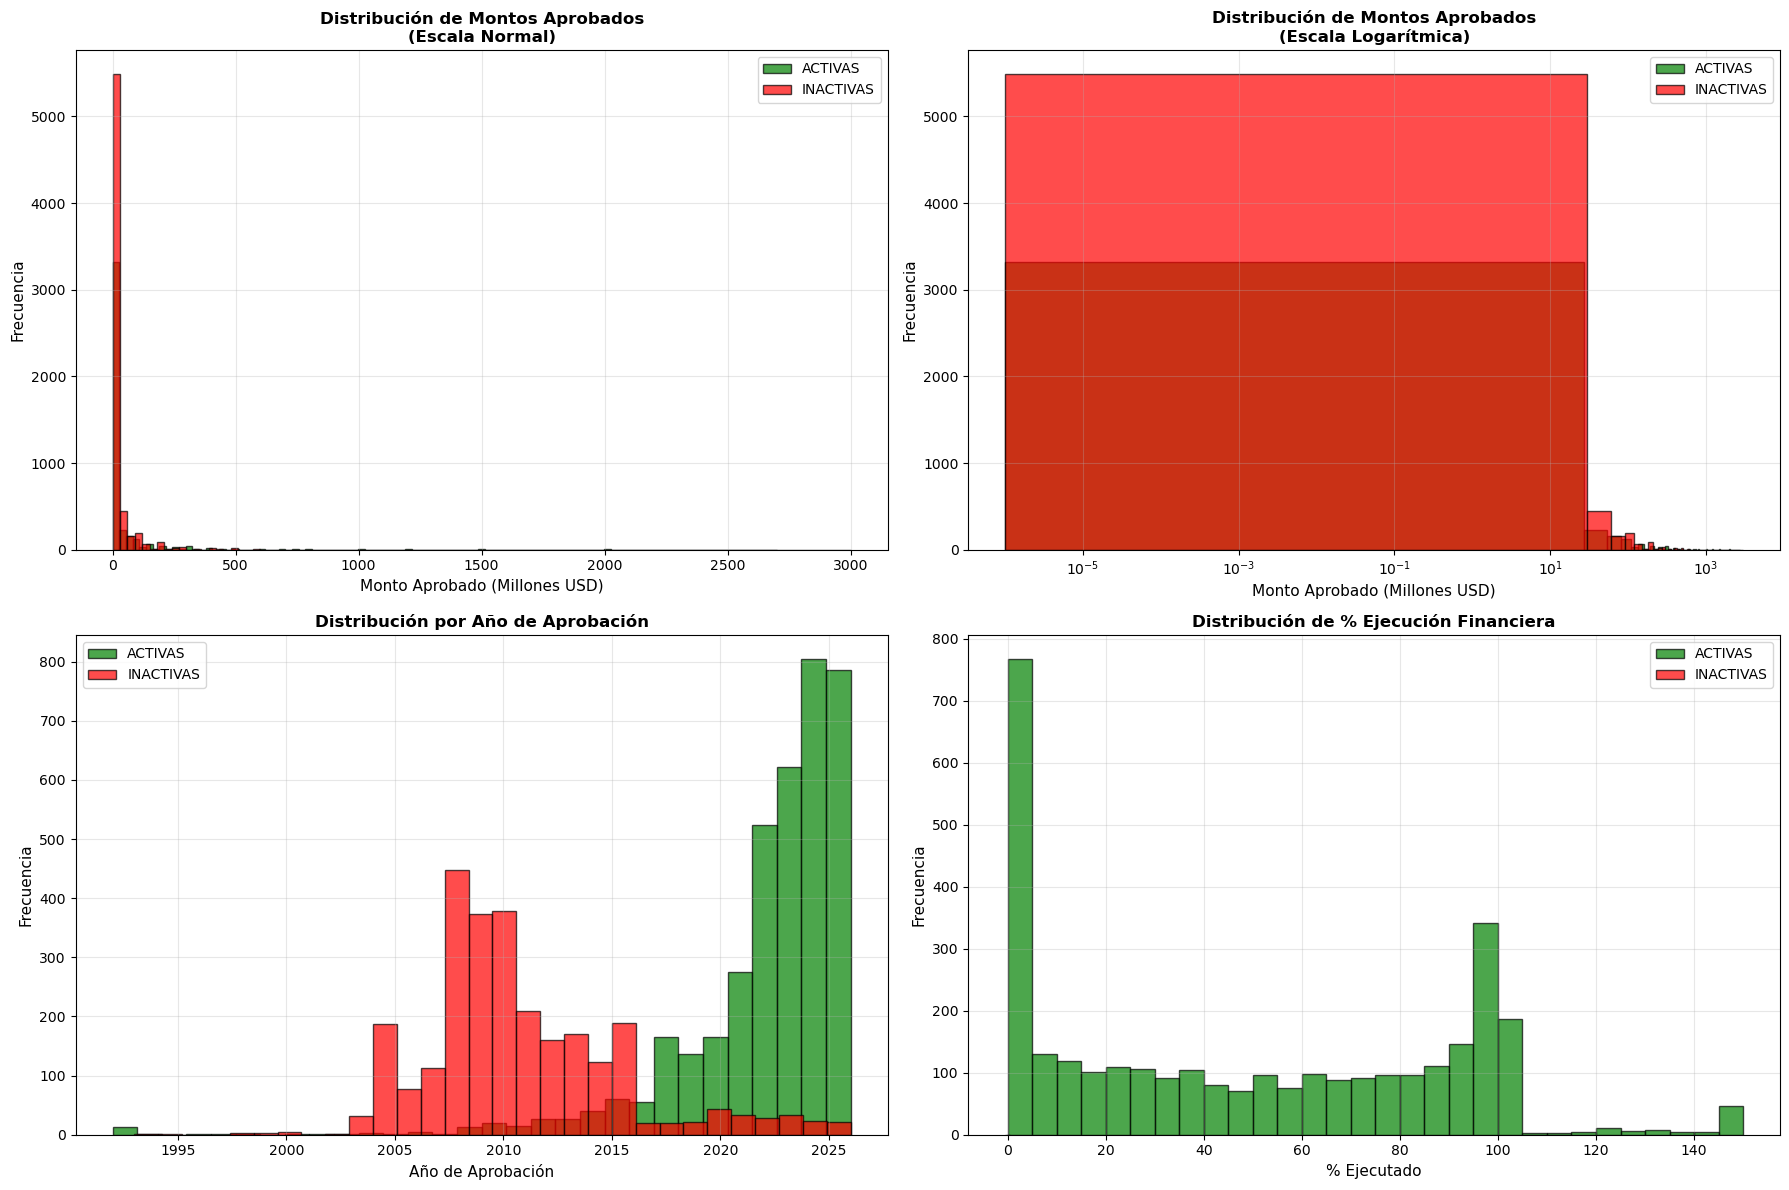


ESTADÍSTICAS COMPARATIVAS: ACTIVAS vs INACTIVAS

--- MONTOS APROBADOS (Millones USD) ---

ACTIVAS:
count    4182.000000
mean       41.248422
std       152.409067
min         0.000001
25%         0.275000
50%         0.600000
75%        10.000000
max      2700.000000
Name: orig_apprvd_useq_amnt, dtype: float64

INACTIVAS:
count    6591.000000
mean       24.801296
std        86.790720
min         0.000001
25%         0.220000
50%         0.600000
75%        15.000000
max      3000.000000
Name: orig_apprvd_useq_amnt, dtype: float64

--- AÑO DE APROBACIÓN ---

ACTIVAS - Rango: 1992 - 2026
Mediana: 2023

INACTIVAS - Rango: 1993 - 2026
Mediana: 2010

--- % EJECUCIÓN ---

ACTIVAS - Promedio: 48.6%
Mediana: 44.6%

INACTIVAS - Promedio: 0.0%
Mediana: 0.0%


In [51]:
# ============================================================================
# HISTOGRAMAS: OPERACIONES ACTIVAS vs INACTIVAS
# ============================================================================

# Separar activas e inactivas (con monto > 0)
df_activo_hist = df_activo[df_activo['orig_apprvd_useq_amnt'] > 0].copy()
df_inactivo_hist = df[(df['sts_engl_nm'] == 'INACTIVE') & (df['orig_apprvd_useq_amnt'] > 0)].copy()

print(f"Operaciones ACTIVAS con monto: {len(df_activo_hist):,}")
print(f"Operaciones INACTIVAS con monto: {len(df_inactivo_hist):,}")

# Crear figura con múltiples histogramas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. DISTRIBUCIÓN DE MONTOS APROBADOS
axes[0,0].hist(df_activo_hist['orig_apprvd_useq_amnt'], bins=100, alpha=0.7, 
               label='ACTIVAS', color='green', edgecolor='black')
axes[0,0].hist(df_inactivo_hist['orig_apprvd_useq_amnt'], bins=100, alpha=0.7, 
               label='INACTIVAS', color='red', edgecolor='black')
axes[0,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,0].set_ylabel('Frecuencia', fontsize=11)
axes[0,0].set_title('Distribución de Montos Aprobados\n(Escala Normal)', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# 2. DISTRIBUCIÓN DE MONTOS APROBADOS (escala logarítmica)
axes[0,1].hist(df_activo_hist['orig_apprvd_useq_amnt'], bins=100, alpha=0.7, 
               label='ACTIVAS', color='green', edgecolor='black')
axes[0,1].hist(df_inactivo_hist['orig_apprvd_useq_amnt'], bins=100, alpha=0.7, 
               label='INACTIVAS', color='red', edgecolor='black')
axes[0,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,1].set_ylabel('Frecuencia', fontsize=11)
axes[0,1].set_xscale('log')
axes[0,1].set_title('Distribución de Montos Aprobados\n(Escala Logarítmica)', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# 3. DISTRIBUCIÓN POR AÑO DE APROBACIÓN
axes[1,0].hist(df_activo_hist['apprvl_dt_yr'].dropna(), bins=30, alpha=0.7, 
               label='ACTIVAS', color='green', edgecolor='black')
axes[1,0].hist(df_inactivo_hist['apprvl_dt_yr'].dropna(), bins=30, alpha=0.7, 
               label='INACTIVAS', color='red', edgecolor='black')
axes[1,0].set_xlabel('Año de Aprobación', fontsize=11)
axes[1,0].set_ylabel('Frecuencia', fontsize=11)
axes[1,0].set_title('Distribución por Año de Aprobación', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 4. DISTRIBUCIÓN DE % EJECUTADO
df_activo_hist['pct_ejecutado'] = (df_activo_hist['disb_amnt_huseq'] / df_activo_hist['orig_apprvd_useq_amnt'] * 100).clip(0, 150)
df_inactivo_hist['pct_ejecutado'] = (df_inactivo_hist['disb_amnt_huseq'] / df_inactivo_hist['orig_apprvd_useq_amnt'] * 100).clip(0, 150)

axes[1,1].hist(df_activo_hist['pct_ejecutado'].dropna(), bins=30, alpha=0.7, 
               label='ACTIVAS', color='green', edgecolor='black')
axes[1,1].hist(df_inactivo_hist['pct_ejecutado'].dropna(), bins=30, alpha=0.7, 
               label='INACTIVAS', color='red', edgecolor='black')
axes[1,1].set_xlabel('% Ejecutado', fontsize=11)
axes[1,1].set_ylabel('Frecuencia', fontsize=11)
axes[1,1].set_title('Distribución de % Ejecución Financiera', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print("\n" + "="*80)
print("ESTADÍSTICAS COMPARATIVAS: ACTIVAS vs INACTIVAS")
print("="*80)

print("\n--- MONTOS APROBADOS (Millones USD) ---")
print("\nACTIVAS:")
print(df_activo_hist['orig_apprvd_useq_amnt'].describe())
print("\nINACTIVAS:")
print(df_inactivo_hist['orig_apprvd_useq_amnt'].describe())

print("\n--- AÑO DE APROBACIÓN ---")
print(f"\nACTIVAS - Rango: {df_activo_hist['apprvl_dt_yr'].min():.0f} - {df_activo_hist['apprvl_dt_yr'].max():.0f}")
print(f"Mediana: {df_activo_hist['apprvl_dt_yr'].median():.0f}")
print(f"\nINACTIVAS - Rango: {df_inactivo_hist['apprvl_dt_yr'].min():.0f} - {df_inactivo_hist['apprvl_dt_yr'].max():.0f}")
print(f"Mediana: {df_inactivo_hist['apprvl_dt_yr'].median():.0f}")

print("\n--- % EJECUCIÓN ---")
print(f"\nACTIVAS - Promedio: {df_activo_hist['pct_ejecutado'].mean():.1f}%")
print(f"Mediana: {df_activo_hist['pct_ejecutado'].median():.1f}%")
print(f"\nINACTIVAS - Promedio: {df_inactivo_hist['pct_ejecutado'].mean():.1f}%")
print(f"Mediana: {df_inactivo_hist['pct_ejecutado'].median():.1f}%")

DATOS PARA HISTOGRAMAS

LOANS Activos: 863 ops, $84,020.3M
LOANS Activos+Inactivos: 2,979 ops, $213,045.3M

TCs Activos: 2,551 ops, $1,496.1M
TCs Activos+Inactivos: 6,477 ops, $3,682.6M


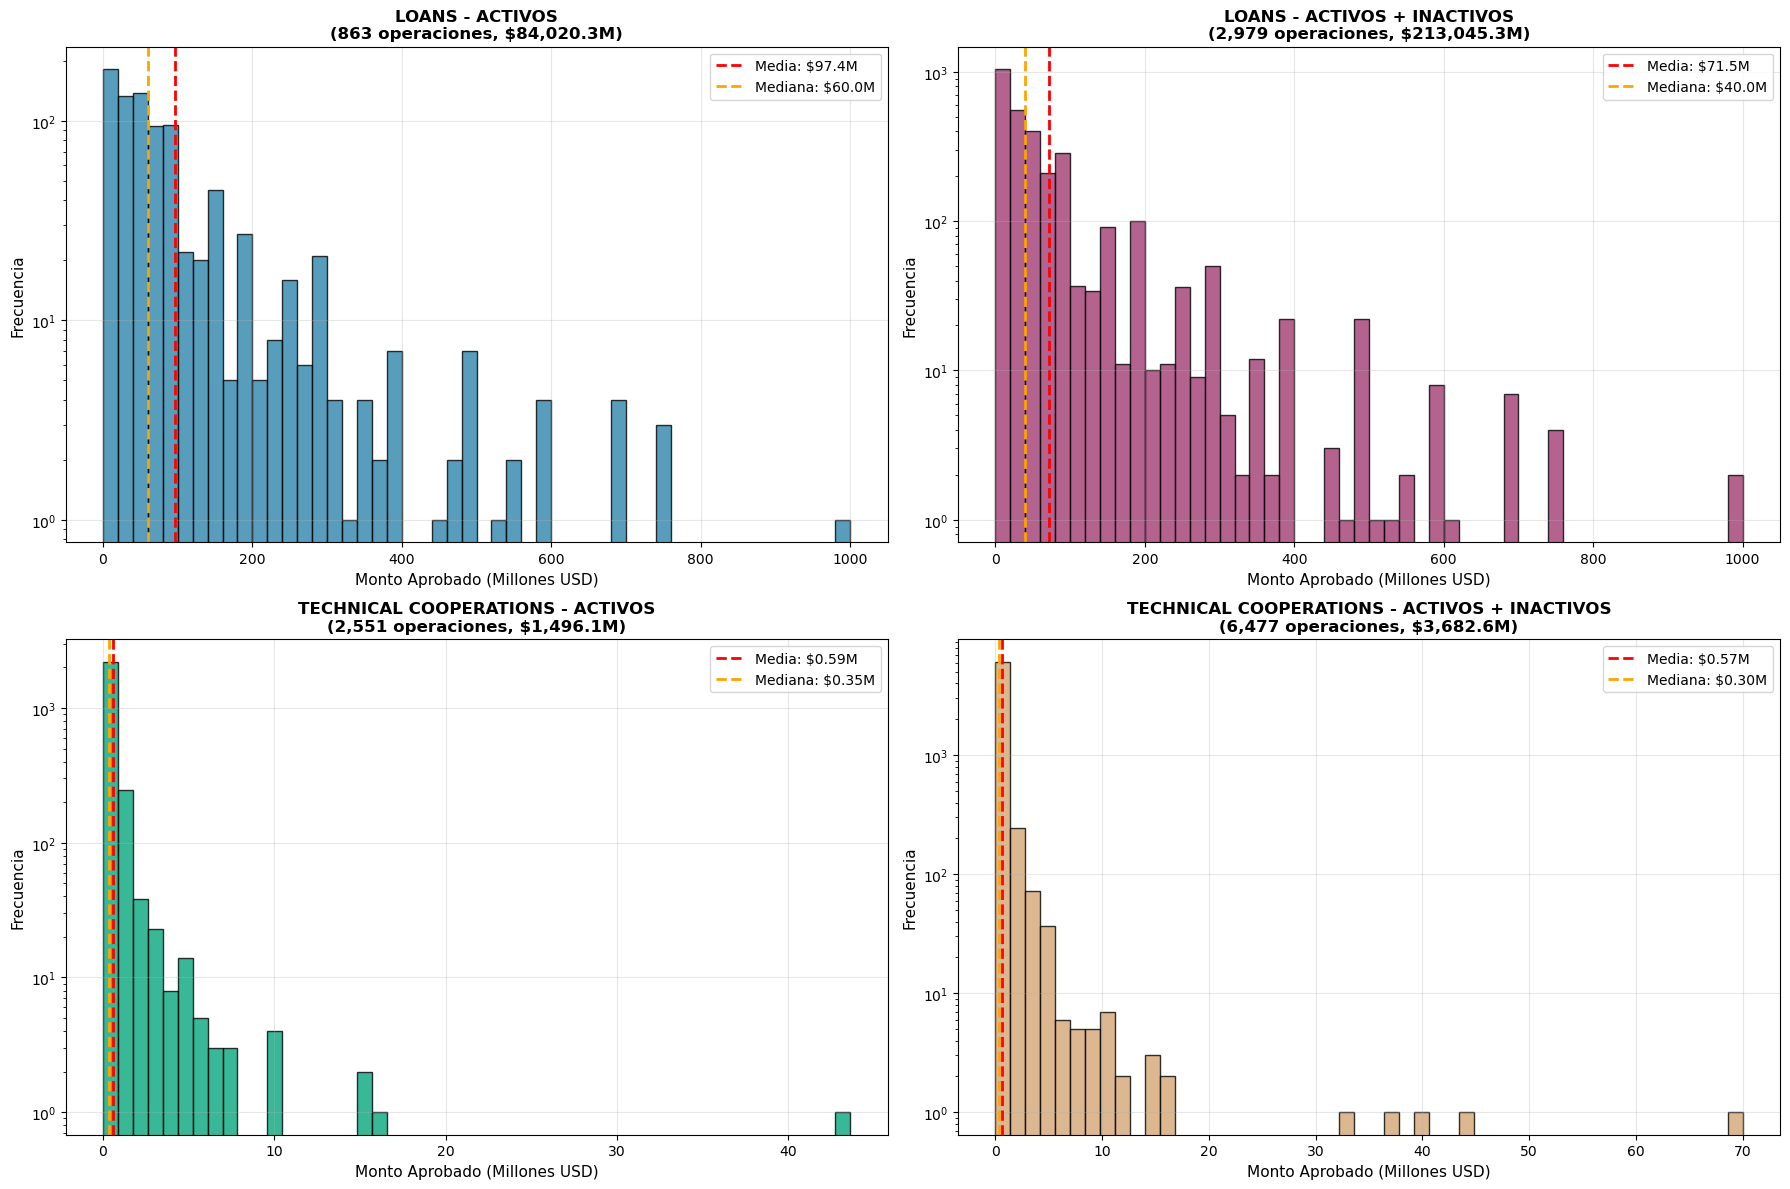


ESTADÍSTICAS COMPARATIVAS DE MONTOS
       LOANS_Activos  LOANS_Act+Inact  TCs_Activos  TCs_Act+Inact
count         863.00          2979.00      2551.00        6477.00
mean           97.36            71.52         0.59           0.57
std           120.00           101.46         1.27           1.56
min             0.40             0.00         0.01           0.00
25%            30.00            15.00         0.20           0.20
50%            60.00            40.00         0.35           0.30
75%           105.82            87.11         0.58           0.55
max          1000.00          1000.00        43.61          70.00


In [54]:
# ============================================================================
# HISTOGRAMAS: LOANS vs TCs, ACTIVOS vs ACTIVOS+INACTIVOS
# ============================================================================

# Preparar datos
loans_activos = df[(df['opertyp_engl_nm'] == 'Loan Operation') & 
                    (df['sts_engl_nm'] == 'ACTIVE') & 
                    (df['orig_apprvd_useq_amnt'] > 0)].copy()

loans_activos_inactivos = df[(df['opertyp_engl_nm'] == 'Loan Operation') & 
                               (df['sts_engl_nm'].isin(['ACTIVE', 'INACTIVE'])) & 
                               (df['orig_apprvd_useq_amnt'] > 0)].copy()

tc_activos = df[(df['opertyp_engl_nm'] == 'Technical Cooperation') & 
                 (df['sts_engl_nm'] == 'ACTIVE') & 
                 (df['orig_apprvd_useq_amnt'] > 0)].copy()

tc_activos_inactivos = df[(df['opertyp_engl_nm'] == 'Technical Cooperation') & 
                            (df['sts_engl_nm'].isin(['ACTIVE', 'INACTIVE'])) & 
                            (df['orig_apprvd_useq_amnt'] > 0)].copy()

print("="*80)
print("DATOS PARA HISTOGRAMAS")
print("="*80)
print(f"\nLOANS Activos: {len(loans_activos):,} ops, ${loans_activos['orig_apprvd_useq_amnt'].sum():,.1f}M")
print(f"LOANS Activos+Inactivos: {len(loans_activos_inactivos):,} ops, ${loans_activos_inactivos['orig_apprvd_useq_amnt'].sum():,.1f}M")
print(f"\nTCs Activos: {len(tc_activos):,} ops, ${tc_activos['orig_apprvd_useq_amnt'].sum():,.1f}M")
print(f"TCs Activos+Inactivos: {len(tc_activos_inactivos):,} ops, ${tc_activos_inactivos['orig_apprvd_useq_amnt'].sum():,.1f}M")

# Crear figura con 4 histogramas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. LOANS ACTIVOS
axes[0,0].hist(loans_activos['orig_apprvd_useq_amnt'], bins=50, 
               color='#2E86AB', edgecolor='black', alpha=0.8)
axes[0,0].axvline(loans_activos['orig_apprvd_useq_amnt'].mean(), 
                   color='red', linestyle='--', linewidth=2, label=f'Media: ${loans_activos["orig_apprvd_useq_amnt"].mean():.1f}M')
axes[0,0].axvline(loans_activos['orig_apprvd_useq_amnt'].median(), 
                   color='orange', linestyle='--', linewidth=2, label=f'Mediana: ${loans_activos["orig_apprvd_useq_amnt"].median():.1f}M')
axes[0,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,0].set_yscale('log')
axes[0,0].set_ylabel('Frecuencia', fontsize=11)
axes[0,0].set_title(f'LOANS - ACTIVOS\n({len(loans_activos):,} operaciones, ${loans_activos["orig_apprvd_useq_amnt"].sum():,.1f}M)', 
                     fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# 2. LOANS ACTIVOS + INACTIVOS
axes[0,1].hist(loans_activos_inactivos['orig_apprvd_useq_amnt'], bins=50, 
               color='#A23B72', edgecolor='black', alpha=0.8)
axes[0,1].axvline(loans_activos_inactivos['orig_apprvd_useq_amnt'].mean(), 
                   color='red', linestyle='--', linewidth=2, label=f'Media: ${loans_activos_inactivos["orig_apprvd_useq_amnt"].mean():.1f}M')
axes[0,1].axvline(loans_activos_inactivos['orig_apprvd_useq_amnt'].median(), 
                   color='orange', linestyle='--', linewidth=2, label=f'Mediana: ${loans_activos_inactivos["orig_apprvd_useq_amnt"].median():.1f}M')
axes[0,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,1].set_yscale('log')
axes[0,1].set_ylabel('Frecuencia', fontsize=11)
axes[0,1].set_title(f'LOANS - ACTIVOS + INACTIVOS\n({len(loans_activos_inactivos):,} operaciones, ${loans_activos_inactivos["orig_apprvd_useq_amnt"].sum():,.1f}M)', 
                     fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# 3. TCs ACTIVOS
axes[1,0].hist(tc_activos['orig_apprvd_useq_amnt'], bins=50, 
               color='#06A77D', edgecolor='black', alpha=0.8)
axes[1,0].axvline(tc_activos['orig_apprvd_useq_amnt'].mean(), 
                   color='red', linestyle='--', linewidth=2, label=f'Media: ${tc_activos["orig_apprvd_useq_amnt"].mean():.2f}M')
axes[1,0].axvline(tc_activos['orig_apprvd_useq_amnt'].median(), 
                   color='orange', linestyle='--', linewidth=2, label=f'Mediana: ${tc_activos["orig_apprvd_useq_amnt"].median():.2f}M')
axes[1,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,0].set_yscale('log')
axes[1,0].set_ylabel('Frecuencia', fontsize=11)
axes[1,0].set_title(f'TECHNICAL COOPERATIONS - ACTIVOS\n({len(tc_activos):,} operaciones, ${tc_activos["orig_apprvd_useq_amnt"].sum():,.1f}M)', 
                     fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 4. TCs ACTIVOS + INACTIVOS
axes[1,1].hist(tc_activos_inactivos['orig_apprvd_useq_amnt'], bins=50, 
               color='#D4A574', edgecolor='black', alpha=0.8)
axes[1,1].axvline(tc_activos_inactivos['orig_apprvd_useq_amnt'].mean(), 
                   color='red', linestyle='--', linewidth=2, label=f'Media: ${tc_activos_inactivos["orig_apprvd_useq_amnt"].mean():.2f}M')
axes[1,1].axvline(tc_activos_inactivos['orig_apprvd_useq_amnt'].median(), 
                   color='orange', linestyle='--', linewidth=2, label=f'Mediana: ${tc_activos_inactivos["orig_apprvd_useq_amnt"].median():.2f}M')
axes[1,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,1].set_yscale('log')
axes[1,1].set_ylabel('Frecuencia', fontsize=11)
axes[1,1].set_title(f'TECHNICAL COOPERATIONS - ACTIVOS + INACTIVOS\n({len(tc_activos_inactivos):,} operaciones, ${tc_activos_inactivos["orig_apprvd_useq_amnt"].sum():,.1f}M)', 
                     fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa
print("\n" + "="*80)
print("ESTADÍSTICAS COMPARATIVAS DE MONTOS")
print("="*80)

comparativa = pd.DataFrame({
    'LOANS_Activos': loans_activos['orig_apprvd_useq_amnt'].describe(),
    'LOANS_Act+Inact': loans_activos_inactivos['orig_apprvd_useq_amnt'].describe(),
    'TCs_Activos': tc_activos['orig_apprvd_useq_amnt'].describe(),
    'TCs_Act+Inact': tc_activos_inactivos['orig_apprvd_useq_amnt'].describe()
}).round(2)

print(comparativa)


AJUSTE DE DISTRIBUCIONES: LOANS ACTIVOS

Lognormal:
  KS statistic: 0.0588
  p-value: 0.0049

Gamma:
  KS statistic: 0.0992
  p-value: 0.0000

Weibull:
  KS statistic: 0.0739
  p-value: 0.0002

Exponencial:
  KS statistic: 0.1054
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0588) ***

AJUSTE DE DISTRIBUCIONES: LOANS ACTIVOS+INACTIVOS

Lognormal:
  KS statistic: 0.0608
  p-value: 0.0000

Gamma:
  KS statistic: 0.0787
  p-value: 0.0000

Weibull:
  KS statistic: 0.0689
  p-value: 0.0000

Exponencial:
  KS statistic: 0.1288
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0608) ***

AJUSTE DE DISTRIBUCIONES: TCs ACTIVOS

Lognormal:
  KS statistic: 0.0797
  p-value: 0.0000

Gamma:
  KS statistic: 0.9467
  p-value: 0.0000

Weibull:
  KS statistic: 0.1678
  p-value: 0.0000

Exponencial:
  KS statistic: 0.1445
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0797) ***

AJUSTE DE DISTRIBUCIONES: TCs ACTIVOS+INACTIVOS

Lognormal:
  KS statistic: 0.0720
  p-value: 0.0000

G

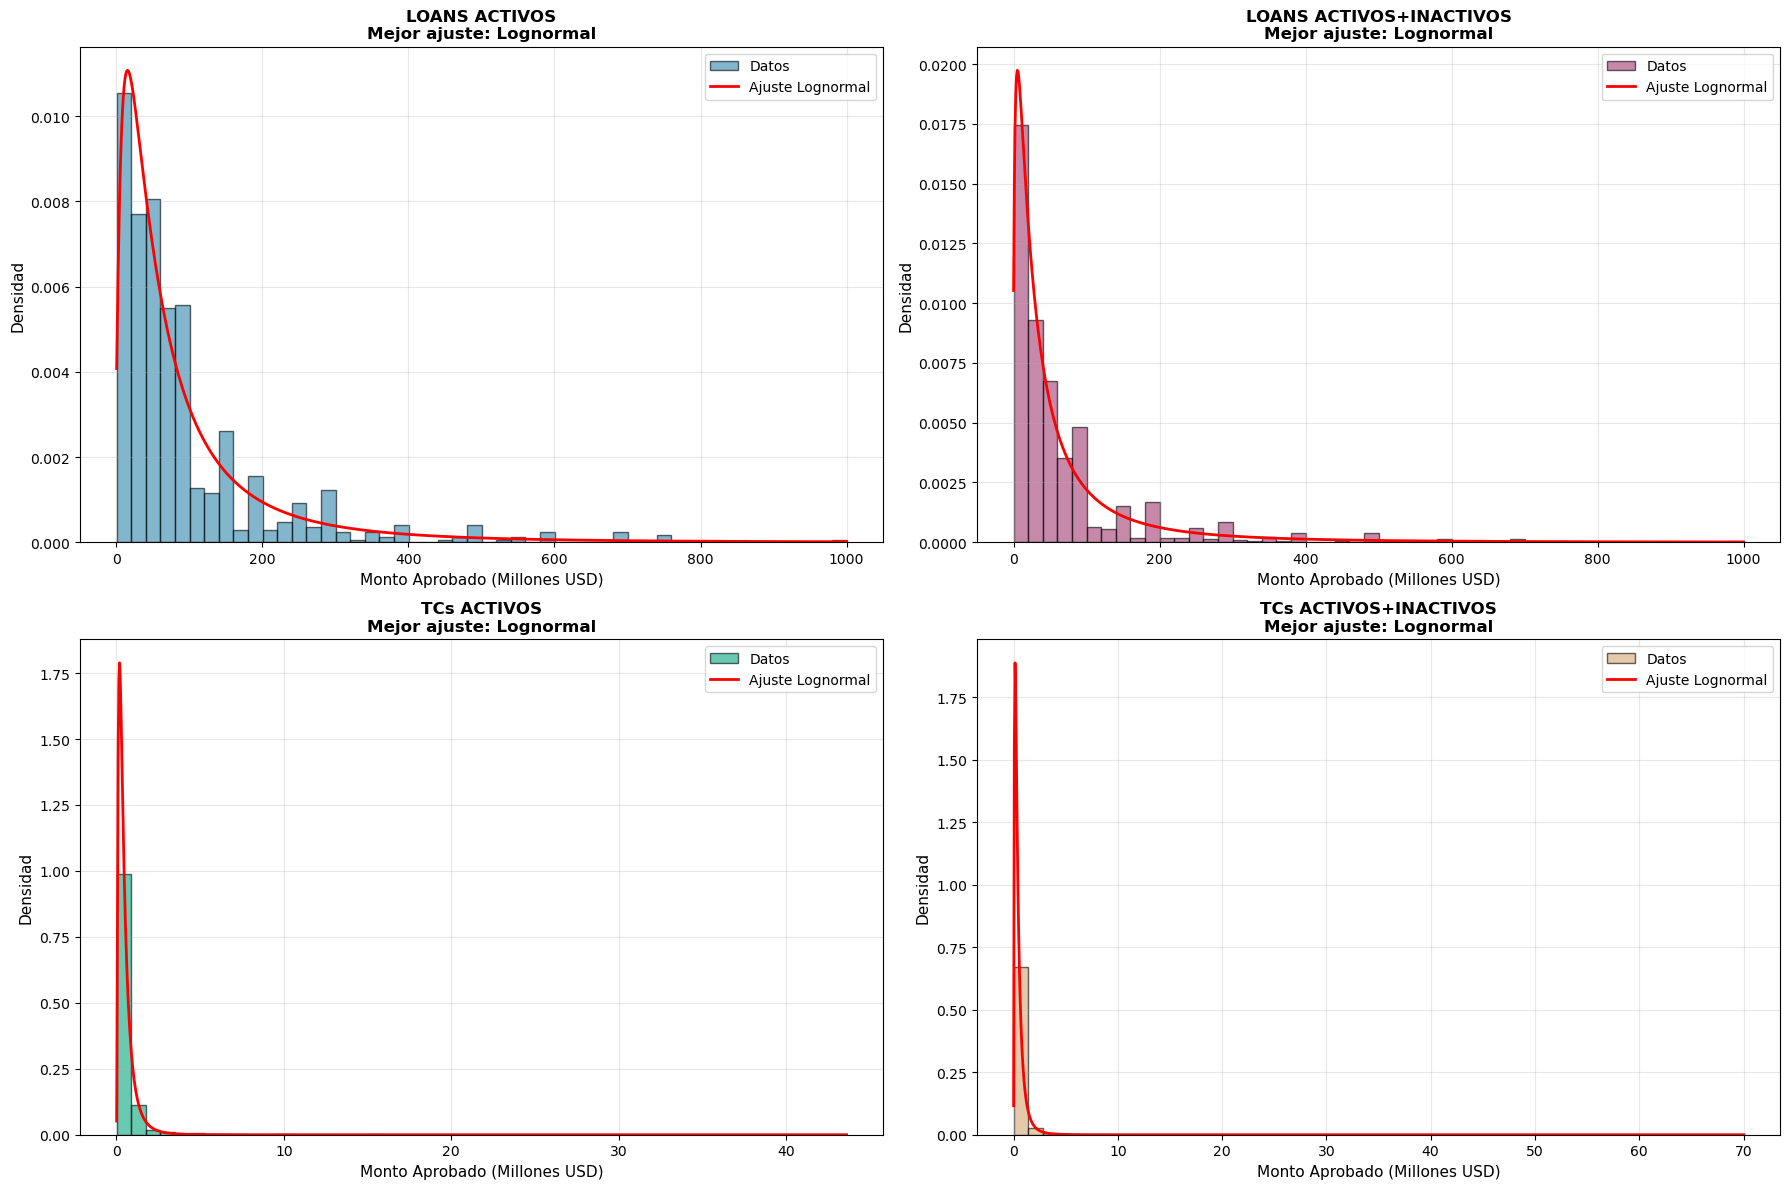


RESUMEN DE AJUSTES

LOANS Activos: Lognormal
LOANS Act+Inact: Lognormal
TCs Activos: Lognormal
TCs Act+Inact: Lognormal


In [55]:
from scipy import stats
from scipy.stats import lognorm, gamma, weibull_min, expon

# ============================================================================
# AJUSTE A DISTRIBUCIONES ESTADÍSTICAS
# ============================================================================

def ajustar_distribuciones(datos, nombre):
    """Ajusta múltiples distribuciones y retorna la mejor"""
    
    print(f"\n{'='*80}")
    print(f"AJUSTE DE DISTRIBUCIONES: {nombre}")
    print(f"{'='*80}")
    
    # Filtrar valores válidos
    datos_clean = datos[datos > 0].dropna()
    
    # Distribuciones a probar
    distribuciones = {
        'Lognormal': lognorm,
        'Gamma': gamma,
        'Weibull': weibull_min,
        'Exponencial': expon
    }
    
    resultados = {}
    
    for nombre_dist, dist in distribuciones.items():
        try:
            # Ajustar parámetros
            params = dist.fit(datos_clean)
            
            # Calcular bondad de ajuste (Kolmogorov-Smirnov)
            ks_stat, ks_pval = stats.kstest(datos_clean, lambda x: dist.cdf(x, *params))
            
            resultados[nombre_dist] = {
                'params': params,
                'ks_stat': ks_stat,
                'ks_pval': ks_pval,
                'dist': dist
            }
            
            print(f"\n{nombre_dist}:")
            print(f"  KS statistic: {ks_stat:.4f}")
            print(f"  p-value: {ks_pval:.4f}")
            
        except Exception as e:
            print(f"\n{nombre_dist}: Error en ajuste - {e}")
    
    # Determinar mejor ajuste (menor KS statistic)
    mejor = min(resultados.items(), key=lambda x: x[1]['ks_stat'])
    print(f"\n*** MEJOR AJUSTE: {mejor[0]} (KS = {mejor[1]['ks_stat']:.4f}) ***")
    
    return datos_clean, resultados, mejor

# Ajustar cada dataset
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. LOANS ACTIVOS
datos1, res1, mejor1 = ajustar_distribuciones(loans_activos['orig_apprvd_useq_amnt'], 'LOANS ACTIVOS')
axes[0,0].hist(datos1, bins=50, density=True, alpha=0.6, color='#2E86AB', edgecolor='black', label='Datos')
x = np.linspace(datos1.min(), datos1.max(), 1000)
axes[0,0].plot(x, mejor1[1]['dist'].pdf(x, *mejor1[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor1[0]}')
axes[0,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,0].set_ylabel('Densidad', fontsize=11)
axes[0,0].set_title(f'LOANS ACTIVOS\nMejor ajuste: {mejor1[0]}', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# 2. LOANS ACTIVOS + INACTIVOS
datos2, res2, mejor2 = ajustar_distribuciones(loans_activos_inactivos['orig_apprvd_useq_amnt'], 'LOANS ACTIVOS+INACTIVOS')
axes[0,1].hist(datos2, bins=50, density=True, alpha=0.6, color='#A23B72', edgecolor='black', label='Datos')
x = np.linspace(datos2.min(), datos2.max(), 1000)
axes[0,1].plot(x, mejor2[1]['dist'].pdf(x, *mejor2[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor2[0]}')
axes[0,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,1].set_ylabel('Densidad', fontsize=11)
axes[0,1].set_title(f'LOANS ACTIVOS+INACTIVOS\nMejor ajuste: {mejor2[0]}', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# 3. TCs ACTIVOS
datos3, res3, mejor3 = ajustar_distribuciones(tc_activos['orig_apprvd_useq_amnt'], 'TCs ACTIVOS')
axes[1,0].hist(datos3, bins=50, density=True, alpha=0.6, color='#06A77D', edgecolor='black', label='Datos')
x = np.linspace(datos3.min(), datos3.max(), 1000)
axes[1,0].plot(x, mejor3[1]['dist'].pdf(x, *mejor3[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor3[0]}')
axes[1,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,0].set_ylabel('Densidad', fontsize=11)
axes[1,0].set_title(f'TCs ACTIVOS\nMejor ajuste: {mejor3[0]}', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 4. TCs ACTIVOS + INACTIVOS
datos4, res4, mejor4 = ajustar_distribuciones(tc_activos_inactivos['orig_apprvd_useq_amnt'], 'TCs ACTIVOS+INACTIVOS')
axes[1,1].hist(datos4, bins=50, density=True, alpha=0.6, color='#D4A574', edgecolor='black', label='Datos')
x = np.linspace(datos4.min(), datos4.max(), 1000)
axes[1,1].plot(x, mejor4[1]['dist'].pdf(x, *mejor4[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor4[0]}')
axes[1,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,1].set_ylabel('Densidad', fontsize=11)
axes[1,1].set_title(f'TCs ACTIVOS+INACTIVOS\nMejor ajuste: {mejor4[0]}', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("RESUMEN DE AJUSTES")
print("="*80)
print(f"\nLOANS Activos: {mejor1[0]}")
print(f"LOANS Act+Inact: {mejor2[0]}")
print(f"TCs Activos: {mejor3[0]}")
print(f"TCs Act+Inact: {mejor4[0]}")


AJUSTE DE DISTRIBUCIONES: LOANS ACTIVOS

Lognormal:
  KS statistic: 0.0588
  p-value: 0.0049

Gamma:
  KS statistic: 0.0992
  p-value: 0.0000

Weibull:
  KS statistic: 0.0739
  p-value: 0.0002

Exponencial:
  KS statistic: 0.1054
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0588) ***

AJUSTE DE DISTRIBUCIONES: LOANS ACTIVOS+INACTIVOS

Lognormal:
  KS statistic: 0.0608
  p-value: 0.0000

Gamma:
  KS statistic: 0.0787
  p-value: 0.0000

Weibull:
  KS statistic: 0.0689
  p-value: 0.0000

Exponencial:
  KS statistic: 0.1288
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0608) ***

AJUSTE DE DISTRIBUCIONES: TCs ACTIVOS

Lognormal:
  KS statistic: 0.0797
  p-value: 0.0000

Gamma:
  KS statistic: 0.9467
  p-value: 0.0000

Weibull:
  KS statistic: 0.1678
  p-value: 0.0000

Exponencial:
  KS statistic: 0.1445
  p-value: 0.0000

*** MEJOR AJUSTE: Lognormal (KS = 0.0797) ***

AJUSTE DE DISTRIBUCIONES: TCs ACTIVOS+INACTIVOS

Lognormal:
  KS statistic: 0.0720
  p-value: 0.0000

G

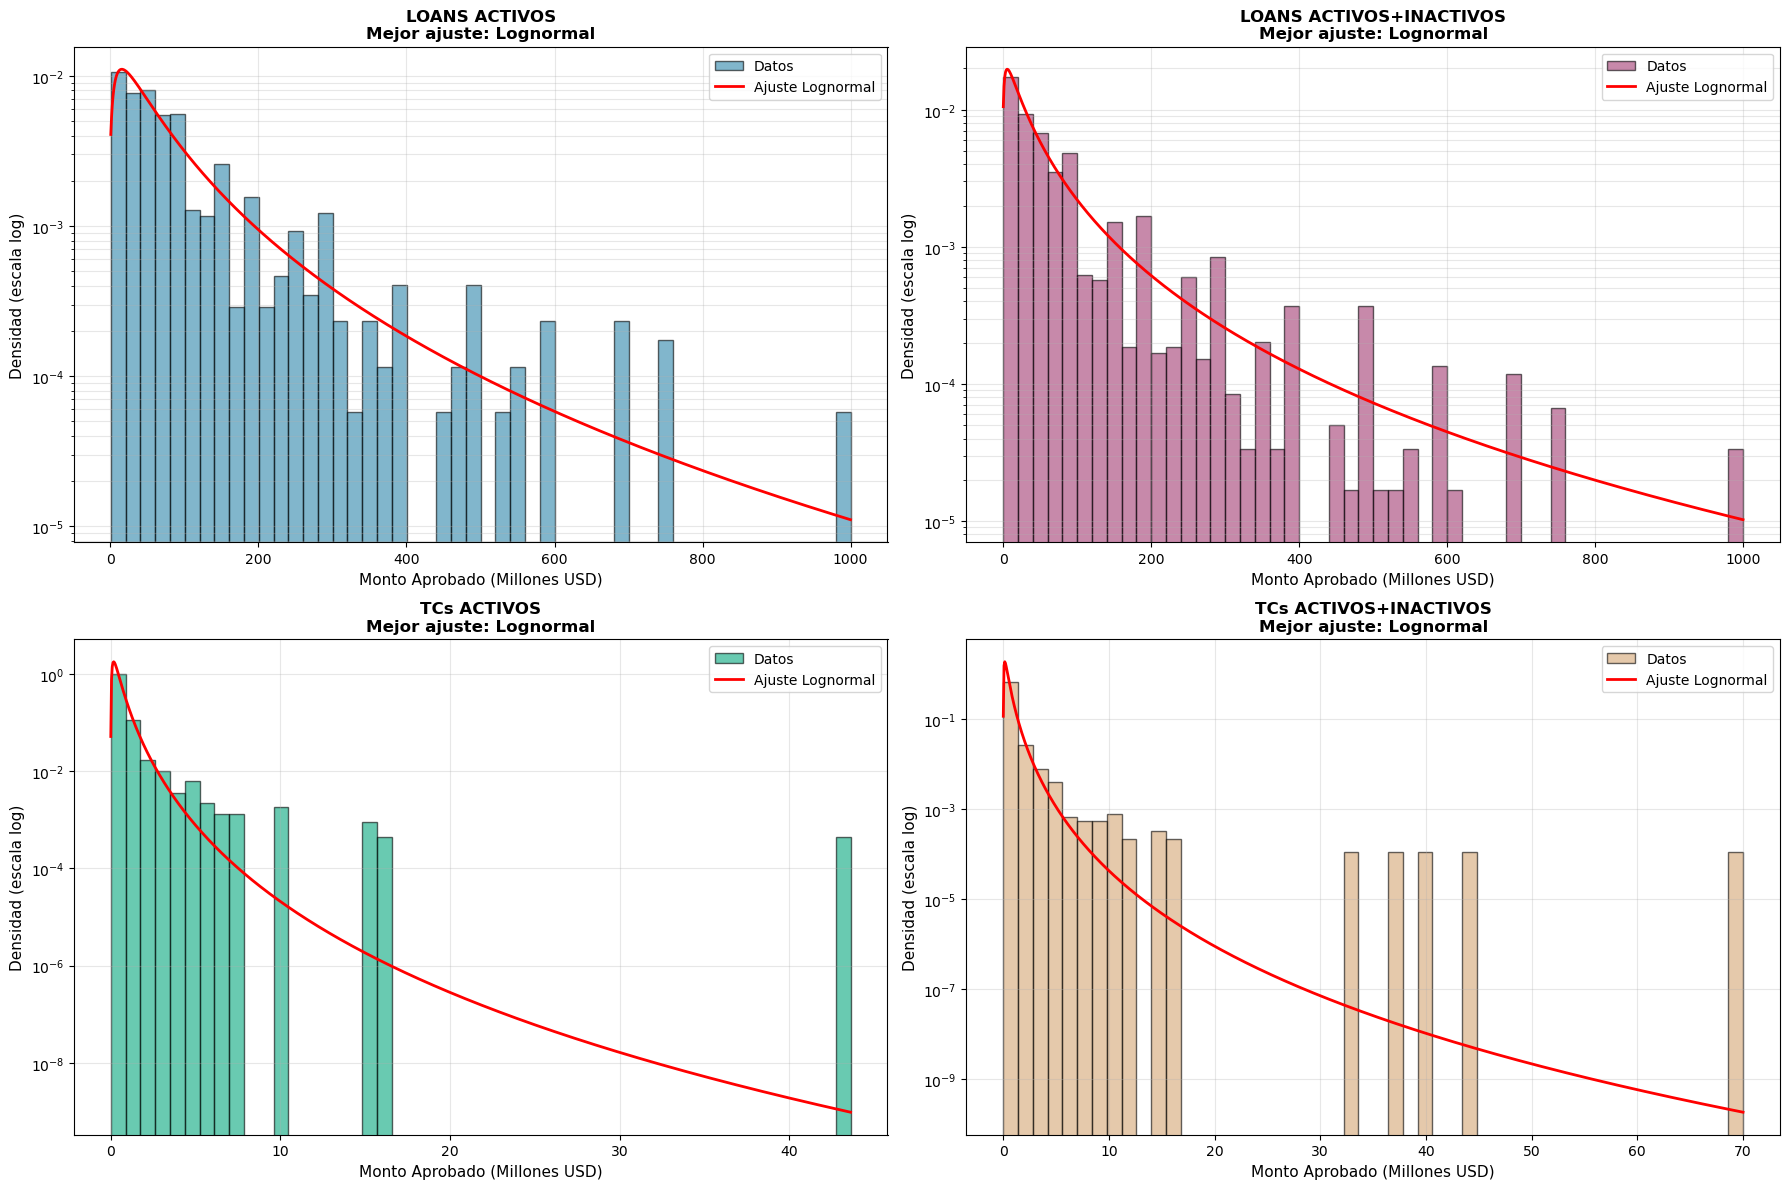


RESUMEN DE AJUSTES

LOANS Activos: Lognormal
LOANS Act+Inact: Lognormal
TCs Activos: Lognormal
TCs Act+Inact: Lognormal


In [56]:
from scipy import stats
from scipy.stats import lognorm, gamma, weibull_min, expon

# ============================================================================
# AJUSTE A DISTRIBUCIONES ESTADÍSTICAS (Escala Log en Y)
# ============================================================================

def ajustar_distribuciones(datos, nombre):
    """Ajusta múltiples distribuciones y retorna la mejor"""
    
    print(f"\n{'='*80}")
    print(f"AJUSTE DE DISTRIBUCIONES: {nombre}")
    print(f"{'='*80}")
    
    # Filtrar valores válidos
    datos_clean = datos[datos > 0].dropna()
    
    # Distribuciones a probar
    distribuciones = {
        'Lognormal': lognorm,
        'Gamma': gamma,
        'Weibull': weibull_min,
        'Exponencial': expon
    }
    
    resultados = {}
    
    for nombre_dist, dist in distribuciones.items():
        try:
            # Ajustar parámetros
            params = dist.fit(datos_clean)
            
            # Calcular bondad de ajuste (Kolmogorov-Smirnov)
            ks_stat, ks_pval = stats.kstest(datos_clean, lambda x: dist.cdf(x, *params))
            
            resultados[nombre_dist] = {
                'params': params,
                'ks_stat': ks_stat,
                'ks_pval': ks_pval,
                'dist': dist
            }
            
            print(f"\n{nombre_dist}:")
            print(f"  KS statistic: {ks_stat:.4f}")
            print(f"  p-value: {ks_pval:.4f}")
            
        except Exception as e:
            print(f"\n{nombre_dist}: Error en ajuste - {e}")
    
    # Determinar mejor ajuste (menor KS statistic)
    mejor = min(resultados.items(), key=lambda x: x[1]['ks_stat'])
    print(f"\n*** MEJOR AJUSTE: {mejor[0]} (KS = {mejor[1]['ks_stat']:.4f}) ***")
    
    return datos_clean, resultados, mejor

# Ajustar cada dataset
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. LOANS ACTIVOS
datos1, res1, mejor1 = ajustar_distribuciones(loans_activos['orig_apprvd_useq_amnt'], 'LOANS ACTIVOS')
axes[0,0].hist(datos1, bins=50, density=True, alpha=0.6, color='#2E86AB', edgecolor='black', label='Datos')
x = np.linspace(datos1.min(), datos1.max(), 1000)
axes[0,0].plot(x, mejor1[1]['dist'].pdf(x, *mejor1[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor1[0]}')
axes[0,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,0].set_ylabel('Densidad (escala log)', fontsize=11)
axes[0,0].set_yscale('log')
axes[0,0].set_title(f'LOANS ACTIVOS\nMejor ajuste: {mejor1[0]}', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3, which='both')

# 2. LOANS ACTIVOS + INACTIVOS
datos2, res2, mejor2 = ajustar_distribuciones(loans_activos_inactivos['orig_apprvd_useq_amnt'], 'LOANS ACTIVOS+INACTIVOS')
axes[0,1].hist(datos2, bins=50, density=True, alpha=0.6, color='#A23B72', edgecolor='black', label='Datos')
x = np.linspace(datos2.min(), datos2.max(), 1000)
axes[0,1].plot(x, mejor2[1]['dist'].pdf(x, *mejor2[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor2[0]}')
axes[0,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[0,1].set_ylabel('Densidad (escala log)', fontsize=11)
axes[0,1].set_yscale('log')
axes[0,1].set_title(f'LOANS ACTIVOS+INACTIVOS\nMejor ajuste: {mejor2[0]}', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3, which='both')

# 3. TCs ACTIVOS
datos3, res3, mejor3 = ajustar_distribuciones(tc_activos['orig_apprvd_useq_amnt'], 'TCs ACTIVOS')
axes[1,0].hist(datos3, bins=50, density=True, alpha=0.6, color='#06A77D', edgecolor='black', label='Datos')
x = np.linspace(datos3.min(), datos3.max(), 1000)
axes[1,0].plot(x, mejor3[1]['dist'].pdf(x, *mejor3[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor3[0]}')
axes[1,0].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,0].set_ylabel('Densidad (escala log)', fontsize=11)
axes[1,0].set_yscale('log')
axes[1,0].set_title(f'TCs ACTIVOS\nMejor ajuste: {mejor3[0]}', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3, which='both')

# 4. TCs ACTIVOS + INACTIVOS
datos4, res4, mejor4 = ajustar_distribuciones(tc_activos_inactivos['orig_apprvd_useq_amnt'], 'TCs ACTIVOS+INACTIVOS')
axes[1,1].hist(datos4, bins=50, density=True, alpha=0.6, color='#D4A574', edgecolor='black', label='Datos')
x = np.linspace(datos4.min(), datos4.max(), 1000)
axes[1,1].plot(x, mejor4[1]['dist'].pdf(x, *mejor4[1]['params']), 'r-', lw=2, label=f'Ajuste {mejor4[0]}')
axes[1,1].set_xlabel('Monto Aprobado (Millones USD)', fontsize=11)
axes[1,1].set_ylabel('Densidad (escala log)', fontsize=11)
axes[1,1].set_yscale('log')
axes[1,1].set_title(f'TCs ACTIVOS+INACTIVOS\nMejor ajuste: {mejor4[0]}', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("RESUMEN DE AJUSTES")
print("="*80)
print(f"\nLOANS Activos: {mejor1[0]}")
print(f"LOANS Act+Inact: {mejor2[0]}")
print(f"TCs Activos: {mejor3[0]}")
print(f"TCs Act+Inact: {mejor4[0]}")

In [9]:
import os
print(f"Tamaño del archivo: {os.path.getsize('data/ledw-spd_ods_hopermas - yr2025 - mth11 - 11-20-2025 - v1.csv') / 1_000_000:.1f} MB")

Tamaño del archivo: 52.6 MB
